Objective: To build and AI-ML based classifier model to assign the tickets to the right functional group by analysing the given description and short description with an accuracy of 60% - 80%

In [1]:
#Import all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set(color_codes=True)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Initialize variables

project_path = "/content/drive/MyDrive/Capstone NLP/Data/"
data = pd.read_excel(project_path + 'input_data.xlsx')

In [4]:
#Analyse the data

data.head()

Short description  ... Assignment group
0                    login issue  ...            GRP_0
1                        outlook  ...            GRP_0
2             cant log in to vpn  ...            GRP_0
3  unable to access hr_tool page  ...            GRP_0
4                   skype error   ...            GRP_0

[5 rows x 4 columns]

In [5]:
#Let's look at the shape of the data
data.shape

(8500, 4)

There are 8500 records in total with 4 attributes.

In [6]:
#Let's look at the columns/keys present in the dataset
data.keys()

Index(['Short description', 'Description', 'Caller', 'Assignment group'], dtype='object')

In [7]:
# Analyse the key attributes of the columns present in the dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


Notable observations: 
1. The datatype of all the columns present in the dataset in object type.
2. There are no null values present in the Caller and Assignment group columns.
3. 8 null values present in the Short description column
4. 1 null value present in the Description column


Target Column- Assignment group

In [8]:
#No. of unique groups
data['Assignment group'].nunique()

74

In [9]:
#Unique groups present in the dataset
data['Assignment group'].unique()

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44',
       'GRP_45', 'GRP_46', 'GRP_47', 'GRP_48', 'GRP_49', 'GRP_50',
       'GRP_51', 'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56',
       'GRP_57', 'GRP_58', 'GRP_59', 'GRP_60', 'GRP_61', 'GRP_32',
       'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67',
       'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73'],
      dtype=object)

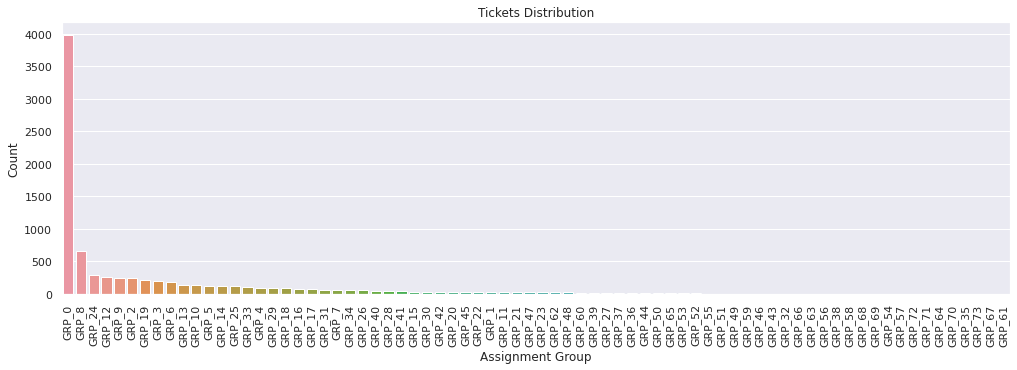

In [10]:
#Visual analysis of distribution of the Assignment group 
plt.subplots(figsize = (17,5))

sns.countplot(x='Assignment group', data=data,order = data['Assignment group'].value_counts().index)
plt.xlabel('Assignment Group') 
plt.ylabel('Count') 
plt.xticks(rotation=90)
plt.title('Tickets Distribution')

plt.show()

In [11]:
#No. of tickets per assignment group in the given dataset
print(data['Assignment group'].value_counts())

GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
          ... 
GRP_70       1
GRP_35       1
GRP_73       1
GRP_67       1
GRP_61       1
Name: Assignment group, Length: 74, dtype: int64


In [12]:
data['Assignment group'].describe()

count      8500
unique       74
top       GRP_0
freq       3976
Name: Assignment group, dtype: object

Notable Observations:
1. Total no. of records w.r.t the Assignment group: 8500
2. There are 74 unqiue groups preent in the given dataset
3. Most frequently occuring group in the given dataset is GRP_0
4. GRP_0 occurs 3976 times or 47% in the given dataset


In [13]:
#Analyse the columns of the dataset
data.describe()

Short description Description             Caller Assignment group
count               8492        8499               8500             8500
unique              7481        7817               2950               74
top       password reset         the  bpctwhsn kzqsbmtp            GRP_0
freq                  38          56                810             3976

Notable Observations:
1. Total no. of records w.r.t the Short description: 8492
2. There are 7481 unqiue Short description present in the given dataset
3. Most frequently occuring group in the given dataset is 'password reset' which occurs 36 times in the given dataset
4. Total no. of records w.r.t the Description: 8499
5. There are 7817 unqiue Description present in the given dataset
6. Total no. of records w.r.t the Caller: 8500
7. There are 2950 unqiue Callers present in the given dataset
8. Most frequently occuring Caller in the given dataset is 'bpctwhsn kzqsbmtp' which occurs 810 times in the given dataset

In [14]:
#No. of tickets per caller
print(data['Caller'].value_counts())

bpctwhsn kzqsbmtp    810
ZkBogxib QsEJzdZO    151
fumkcsji sarmtlhy    134
rbozivdq gmlhrtvp     87
rkupnshb gsmzfojw     71
                    ... 
kqvbrspl jyzoklfx      1
gwkjrobm wrsznjmx      1
qhyoiwls uynrhiva      1
ctxribfl hiwckyrn      1
hqyfebtd pkmyrdga      1
Name: Caller, Length: 2950, dtype: int64


Missing Value Analysis

In [15]:
#Finding null or nan values
data.isnull().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

In [16]:
data.isna().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

In [17]:
#Print the records with missing values
nls=np.where(pd.isnull(data))[0]
for nl in nls:
  print(data.iloc[nl])

Short description                                                  NaN
Description          \r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail...
Caller                                               ohdrnswl rezuibdt
Assignment group                                                GRP_34
Name: 2604, dtype: object
Short description                                                  NaN
Description          \r\n-connected to the user system using teamvi...
Caller                                               qftpazns fxpnytmk
Assignment group                                                 GRP_0
Name: 3383, dtype: object
Short description                                                  NaN
Description          -user unable  tologin to vpn.\r\n-connected to...
Caller                                               awpcmsey ctdiuqwe
Assignment group                                                 GRP_0
Name: 3906, dtype: object
Short description                                                  NaN

In [18]:
data_copy = data.copy()

In [19]:
#Function to remove the records with the missing values

def RemoveMissing(val):
   val.dropna(inplace=True)
   return val

In [20]:
#Remove the records with missing values(Null/NaN)
RemoveMissing(data_copy)

Short description  ... Assignment group
0                                           login issue  ...            GRP_0
1                                               outlook  ...            GRP_0
2                                    cant log in to vpn  ...            GRP_0
3                         unable to access hr_tool page  ...            GRP_0
4                                          skype error   ...            GRP_0
...                                                 ...  ...              ...
8495                  emails not coming in from zz mail  ...           GRP_29
8496                           telephony_software issue  ...            GRP_0
8497  vip2: windows password reset for tifpdchb pedx...  ...            GRP_0
8498                     machine nÃ£o estÃ¡ funcionando  ...           GRP_62
8499  an mehreren pc`s lassen sich verschiedene prgr...  ...           GRP_49

[8491 rows x 4 columns]

In [21]:
#Check if null still exists
data_copy.isnull().sum()

Short description    0
Description          0
Caller               0
Assignment group     0
dtype: int64

Records with Null/Missing values removed successfully

In [22]:
#Let's look at the data shape after removing the missing values
data_copy.shape

(8491, 4)

8491 records are present in the given dataset now.

Duplicate Records

In [23]:
#Find the records with duplicate values
data_dup = data_copy[data_copy.duplicated()]
data_dup

Short description  ... Assignment group
51                           call for ecwtrjnq jpecxuty  ...            GRP_0
229                          call for ecwtrjnq jpecxuty  ...            GRP_0
493                     ticket update on inplant_872730  ...            GRP_0
512                                    blank call //gso  ...            GRP_0
667   job bkbackup_tool_powder_prod_full failed in j...  ...            GRP_8
...                                                 ...  ...              ...
7836             probleme mit erpgui \tmqfjard qzhgdoua  ...           GRP_24
8051               issue on pricing in distributor_tool  ...           GRP_21
8093  reset passwords for prgthyuulla ramdntythanjes...  ...           GRP_17
8347                           blank call // loud noise  ...            GRP_0
8405                           unable to launch outlook  ...            GRP_0

[83 rows x 4 columns]

In [24]:
print('No. of duplicate records:', data_copy.duplicated().sum())

No. of duplicate records: 83


There are 83 rows in the dataset with duplicate values which can be removed

In [25]:
#Drop the duplicate records
data_copy.drop_duplicates(inplace=True)

In [26]:
#Check if duplicates have been removed or not
data_copy.duplicated().sum()

0

The duplicate records have been removed successfully. 

In [27]:
#Let's look at the shape of the data after removing the duplicates

data_copy.shape

(8408, 4)

After removing the duplicates, we are left with 8408 records in the dataset

Create Custom Column- "Full Description"

In [28]:
#Let's create a new column 'Full Description' by mergining the short description and the description

data_copy['Full Description'] = data_copy['Short description'].map(str) + ' ' + data_copy['Description'].map(str)

In [29]:
data_copy.head()

Short description  ...                                   Full Description
0                    login issue  ...  login issue -verified user details.(employee# ...
1                        outlook  ...  outlook \r\n\r\nreceived from: hmjdrvpb.komuay...
2             cant log in to vpn  ...  cant log in to vpn \r\n\r\nreceived from: eylq...
3  unable to access hr_tool page  ...  unable to access hr_tool page unable to access...
4                   skype error   ...                          skype error  skype error 

[5 rows x 5 columns]

In [30]:
#Get the length of Full Descrpption column and add that to the data frame
data_copy['Char_len'] = data_copy['Full Description'].str.len()

In [31]:
print('Minimum character length:', data_copy['Char_len'].min())
print('Maximum character length:', data_copy['Char_len'].max())

Minimum character length: 3
Maximum character length: 13104


In [32]:
print('Line with min length:', data_copy[data_copy['Char_len'] == 3]['Full Description'].values[0])

Line with min length: s s


In [33]:
print('Line with max length:', data_copy[data_copy['Char_len'] == 13104]['Full Description'].values[0])

Line with max length: security incidents - ( sw #in33501789 ) : broadscanning: possible vulnerability scanning - 46.161.9.35 we are seeing activity indicating the host at 46.161.9.35 is conducting a vulnerability scan. these scans are used to identify specific vulnerabilities on a remote host that could be exploited to potentially interfere with service availability, execute code, or usa an attacker with unauthorized access. the results of this scan could be used for future attacks or exploitation of the targeted host(s). 

based on our internet visibility we are detecting this as a non-targeted broadscan. similar activity from this source has been detected across our client base. please consider blocking this ip address and investigating the host for any malicious scrip

we are escalating this incident to you via a medium priority ticket as per our default event handling procedures. if you would like us to handle these incidents differently in the future (see below for handling option

In [34]:
data_copy.head()

Short description  ... Char_len
0                    login issue  ...      218
1                        outlook  ...      202
2             cant log in to vpn  ...      106
3  unable to access hr_tool page  ...       59
4                   skype error   ...       25

[5 rows x 6 columns]

In [35]:
#Let's first look at full description column of any of the records

data_copy.iloc[4535,4]

'job Job_593 failed in job_scheduler at: 09/13/2016 04:13:00   received from: monitoring_tool@company.com\r\n\r\njob Job_593 failed in job_scheduler at: 09/13/2016 04:13:00'

For EDA, add columns Char_len and Word_len to dataframe
1. Char_len: No. of characters in full description column
2. Word_len: No. of words in full description column

In [36]:
#Get the no. of words in Full Description column and add that to the data frame
data_copy['Word_len'] = data_copy['Full Description'].apply(lambda x :len(str(x).split()))
data_copy.head()

Short description  ... Word_len
0                    login issue  ...       35
1                        outlook  ...       26
2             cant log in to vpn  ...       16
3  unable to access hr_tool page  ...       10
4                   skype error   ...        4

[5 rows x 7 columns]

In [37]:
#Word_len
print('Minimum character length:', data_copy['Word_len'].min())
print('Maximum character length:', data_copy['Word_len'].max())

Minimum character length: 2
Maximum character length: 1639


Visual Analysis: Distribution of char_len across the given dataset

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


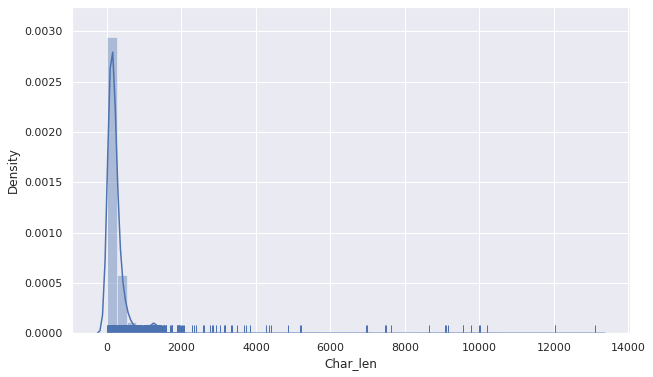

In [38]:
plt.subplots(figsize = (10,6))
sns.distplot(data_copy['Char_len'], rug=True)
plt.show()

In [39]:
data_copy['Char_len'].describe()

count     8408.000000
mean       253.855495
std        527.989083
min          3.000000
25%         84.000000
50%        167.000000
75%        250.000000
max      13104.000000
Name: Char_len, dtype: float64

Char_len to be used:

In [40]:
# Text preprocessing
from wordcloud import WordCloud, STOPWORDS

In [41]:
print(STOPWORDS)

{'here', "that's", "don't", 'am', 'each', 'me', 'until', 'than', "where's", 'cannot', 'other', "he'll", 'above', 'has', 'her', 'ours', 'some', 'else', "i'd", 'why', 'same', "when's", 'of', 'those', 'himself', 'at', "won't", 'their', 'through', 'only', "shouldn't", 'off', "they'd", 'which', 'myself', 'k', 'however', 'no', 'by', 'are', 'between', 'i', 'out', 'our', 'since', 'once', 'where', "i'll", 'this', 'yours', 'would', 'on', 'could', 'and', 'who', "let's", 'does', 'because', "you'll", 'after', "they've", "hasn't", 'my', "weren't", 'doing', "we'd", 'also', "who's", 'just', 'should', 'having', 'a', "we're", 'but', 'for', "she'd", 'very', 'so', 'not', 'all', 'if', 'www', 'over', 'otherwise', 'your', 'herself', 'had', 'any', 'further', 'against', 'have', 'itself', "can't", 'under', 'get', "isn't", 'while', 'to', 'he', "they're", 'in', "couldn't", 'that', 'an', 'during', 'you', 'then', "haven't", 'ought', "we'll", 'com', 'is', "you'd", 'being', 'been', "he's", 'r', "wasn't", 'down', "did

Add columns STOPWORDS_len and STOPWORDS to the dataframe
1. STOPWORDS_len: No. of stopwords in the full description column
2. STOPWORDS: Stop words in the full description column

In [42]:
#Apply stop words to the full description column of the dataset
data_copy['STOPWORDS_len']=data_copy['Full Description'].apply(lambda x : len([t for t in x.split() if t in STOPWORDS]))
data_copy['STOPWORDS'] = data_copy['Full Description'].apply(lambda x : [t for t in x.split() if t in STOPWORDS])

In [43]:
data_copy.head()

Short description  ...                                          STOPWORDS
0                    login issue  ...  [the, in, and, the, the, to, and, that, he, wa...
1                        outlook  ...               [my, are, not, in, my, can, how, to]
2             cant log in to vpn  ...                        [in, to, i, cannot, on, to]
3  unable to access hr_tool page  ...                                           [to, to]
4                   skype error   ...                                                 []

[5 rows x 9 columns]

In [44]:
#Text Pre-processing

import nltk
import string
import spacy
import re
import unicodedata

#Beautiful Soup is a library that makes it easy to scrape information from web pages.
from bs4 import BeautifulSoup  


In [45]:
#Define a function to clean the data
callers = data_copy['Caller'].unique() 
def text_preprocessing(text):
  # Remove html tags
  text=BeautifulSoup(text,'html.parser').get_text()     #It returns all the text in a document or beneath a tag, as a single Unicode string.
  # Remove Accented text
  text=unicodedata.normalize('NFKD',text).encode('ascii','ignore').decode('utf-8','ignore')

  # Removing special chars
  pat=r'[^A-Za-z0-9.,!?/:;\"\'\s]'
  text=re.sub(pat,' ',text)
  # Remove punctuations
  text=''.join([t for t in text if t not in string.punctuation])

  #text = ' '.join([w for w in text.split() if not is_valid_date(w)])
  text = re.sub(r"received from:",' ',text)
  text = re.sub(r"from:",' ',text)
  text = re.sub(r"to:",' ',text)
  text = re.sub(r"subject:",' ',text)
  text = re.sub(r"sent:",' ',text)
  text = re.sub(r"ic:",' ',text)
  text = re.sub(r"cc:",' ',text)
  text = re.sub(r"bcc:",' ',text)  

  # Remove extra white spaces
  text=re.sub('\s+',' ',text)

  # Remove new line characters 
  text = re.sub(r'\n',' ',text)

  # Lower case
  text=text.lower()

  # Removing HTML tags
  cleanr = re.compile('<.*?>')
  text = re.sub(cleanr, ' ',text)
  # Remove Email Id
  text = re.sub(r'\S*@\S*\s?', '', text)
  
  # Remove characters beyond Readable formart by Unicode:
  text= ''.join(c for c in text if c <= '\uFFFF') 
  text = text.strip()
  # Remove numbers
  text = re.sub(r'\d+','' ,text)

  # Remove hyperlinks
  text = re.sub(r'https?:\/\/.*\/\w*', '', text) 

  # Remove characters beyond Readable formart by Unicode:
  text= ''.join(c for c in text if c <= '\uFFFF') 
  text = text.strip()

  # Remove unreadable characters  (also extra spaces)
  text = ' '.join(re.sub("[^\u0030-\u0039\u0041-\u005a\u0061-\u007a]", " ", text).split())
  for name in callers:
    namelist = [part for part in name.split()]
    for namepart in namelist:
      text = text.replace(namepart,'')

  return text


In [46]:
#Let's look at the full description of one of the tickets
data_copy['Full Description'][84]

'engineering tool drawing originals in pdf format are not shown hello it service,\r\ni need to monitor the manufacturing drawings to approve manufacturing.\r\nthe engineering tool stopped showing pdf originals:\r\n\r\nprocess: \r\n\r\n\r\n[[erp] /production_order_interface_vendor/bas_cr 167 - rfc destination production_order_interface_vendor-views-010 not accessible (file cannot be stamped now; ).]\r\n  08:06:34  \r\n    bapireturnederrorexception\r\n    [stack trace]\r\n    cadagent.erp.conn.jco.tm.jcoerpmanager.handlereturnstructureorreturntableline(jcoerpmanager.java:379, @(#) $id: jcoerpmanager.java 60470 2015-07-24 09:02:22z wt $)\r\n    cadagent.erp.conn.jco.tm.jcoerpmanager.handlereturnstructure(jcoerpmanager.java:360, @(#) $id: jcoerpmanager.java 60470 2015-07-24 09:02:22z wt $)\r\n    cadagent.erp.conn.jco.tm.jcoerpmanager.generirtcfunction(jcoerpmanager.java:324, @(#) $id: jcoerpmanager.java 60470 2015-07-24 09:02:22z wt $)\r\n    cadagent.objmod.plmfile.checkoutview(plmfile.

In [47]:
#Apply text preprocessing to the full description column of the data frame

data_copy['Full Description'] = data_copy['Full Description'].apply(text_preprocessing)

In [48]:
#Let's look at the full description of the same ticket after text preprocessing
data_copy['Full Description'][84]

'engineering tool drawing originals in pdf format are not shown hello it service i need to monitor the manufacturing drawings to approve manufacturing the engineering tool stopped showing pdf originals process erp production order interface vendorbas cr rfc destination production order interface vendor views not accessible file cannot be stamped now bapireturnederrorexception stack trace cadagenterpconnjcotmjcoerpmanagerhandlereturnstructureorreturntableline jcoerpmanagerjava id jcoerpmanagerjava z wt cadagenterpconnjcotmjcoerpmanagerhandlereturnstructure jcoerpmanagerjava id jcoerpmanagerjava z wt cadagenterpconnjcotmjcoerpmanagergenerirtcfunction jcoerpmanagerjava id jcoerpmanagerjava z wt cadagentobjmodplmfilecheckoutview plmfilejava id plmfilejava z aju plmomfomforiginalsexportcheckoutbapi omforiginalsexportjava id omforiginalsexportjava z rb plmomfomforiginalsexportdownloaddocumentoriginals omforiginalsexportjava id omforiginalsexportjava z rb plmomfomforiginalsexportactionperform

It can be seen by looking at the description and short description that the data belongs to more than one language

In [49]:
 !pip install langdetect
 from langdetect import detect
 data_copy['language'] = data_copy['Full Description'].apply(detect)

     |████████████████████████████████| 983kB 5.8MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993194 sha256=5d6f9982cc8a71b5a2ed1ce5dfcea68abdeb6b1ee7f271c59d4c8f34e3edccf3
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


In [50]:
data_copy.head(10)

Short description  ... language
0                                        login issue  ...       en
1                                            outlook  ...       en
2                                 cant log in to vpn  ...       en
3                      unable to access hr_tool page  ...       en
4                                       skype error   ...       no
5     unable to log in to engineering tool and skype  ...       en
6  event: critical:HostName_221.company.com the v...  ...       en
7  ticket_no1550391- employment status - new non-...  ...       en
8               unable to disable add ins on outlook  ...       en
9                    ticket update on inplant_874773  ...       en

[10 rows x 10 columns]

In [51]:
print('Languages identified:', data_copy['language'].unique())
print('No. of Languages identified:', len(data_copy['language'].unique()))

Languages identified: ['en' 'no' 'fr' 'it' 'es' 'af' 'sv' 'ca' 'id' 'fi' 'de' 'nl' 'cy' 'ro'
 'hu' 'pl' 'et' 'da' 'tl' 'so' 'pt' 'sw' 'lt' 'cs' 'sk' 'sl' 'hr' 'tr']
No. of Languages identified: 28


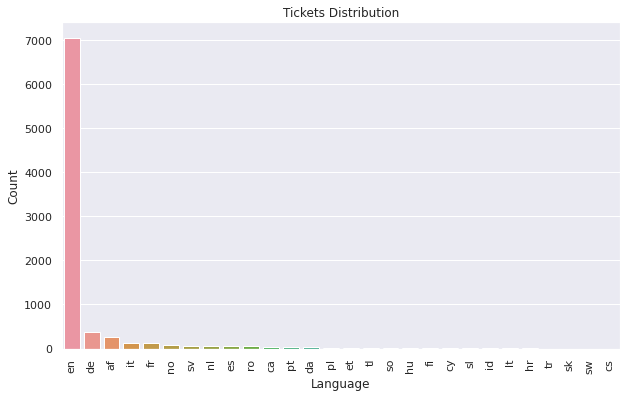

In [52]:
plt.subplots(figsize = (10,6))

sns.countplot(x='language', data=data_copy,order = data_copy['language'].value_counts().index)
plt.xlabel('Language') 
plt.ylabel('Count') 
plt.xticks(rotation=90)
plt.title('Tickets Distribution')

plt.show()

In [53]:
#Lemmatization

from nltk.corpus import stopwords
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger') 

# install spacy and plt for gensim  
!pip install -q spacy 
import spacy
nlp = spacy.load('en', disable=['parser', 'ner'])
allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']

def lemmatize_text(text):
  doc = nlp(text)
  return ' '.join([token.lemma_ for token in doc])



data_copy['Full Description'] = data_copy['Full Description'].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [54]:
#Let's look at the Full Description column after lemmetization
data_copy['Full Description'][84]

'engineering tool drawing original in pdf format be not show hello -PRON- service i need to monitor the manufacturing drawing to approve manufacture the engineering tool stop show pdf original process erp production order interface vendorbas cr rfc destination production order interface vendor view not accessible file can not be stamp now bapireturnederrorexception stack trace cadagenterpconnjcotmjcoerpmanagerhandlereturnstructureorreturntableline jcoerpmanagerjava -PRON- would jcoerpmanagerjava z wt cadagenterpconnjcotmjcoerpmanagerhandlereturnstructure jcoerpmanagerjava -PRON- would jcoerpmanagerjava z wt cadagenterpconnjcotmjcoerpmanagergenerirtcfunction jcoerpmanagerjava -PRON- would jcoerpmanagerjava z wt cadagentobjmodplmfilecheckoutview plmfilejava -PRON- would plmfilejava z aju plmomfomforiginalsexportcheckoutbapi omforiginalsexportjava -PRON- would omforiginalsexportjava z rb plmomfomforiginalsexportdownloaddocumentoriginal omforiginalsexportjava -PRON- would omforiginalsexpor

In [55]:
#Create a copy of the clean data
data_clean = data_copy.copy()

In [56]:
data_clean.head()

Short description  ... language
0                    login issue  ...       en
1                        outlook  ...       en
2             cant log in to vpn  ...       en
3  unable to access hr_tool page  ...       en
4                   skype error   ...       no

[5 rows x 10 columns]

In [57]:
data_eng = data_clean[data_clean['language'] == 'en']
data_eng.head()

Short description  ... language
0                                     login issue  ...       en
1                                         outlook  ...       en
2                              cant log in to vpn  ...       en
3                   unable to access hr_tool page  ...       en
5  unable to log in to engineering tool and skype  ...       en

[5 rows x 10 columns]

In [58]:
data_eng.shape

(7042, 10)

In [59]:
#Remove unwanted columns

data_clean = data_clean.drop(['Short description', 'Description', 'Caller', 'Char_len', 'Word_len', 'STOPWORDS_len', 'STOPWORDS', 'language'], axis=1)
data_eng = data_eng.drop(['Short description', 'Description', 'Caller', 'Char_len', 'Word_len', 'STOPWORDS_len', 'STOPWORDS', 'language'], axis=1)

In [60]:
data_clean.head()

Assignment group                                   Full Description
0            GRP_0  login issue verify user detail employee manage...
1            GRP_0  outlook receive from   gmailcom hello team -PR...
2            GRP_0  can not log in to vpn receive from   gmailcom ...
3            GRP_0  unable to access hr tool page unable to access...
4            GRP_0                            skype error skype error

In [61]:
data_eng.head()

Assignment group                                   Full Description
0            GRP_0  login issue verify user detail employee manage...
1            GRP_0  outlook receive from   gmailcom hello team -PR...
2            GRP_0  can not log in to vpn receive from   gmailcom ...
3            GRP_0  unable to access hr tool page unable to access...
5            GRP_0  unable to log in to engineering tool and skype...

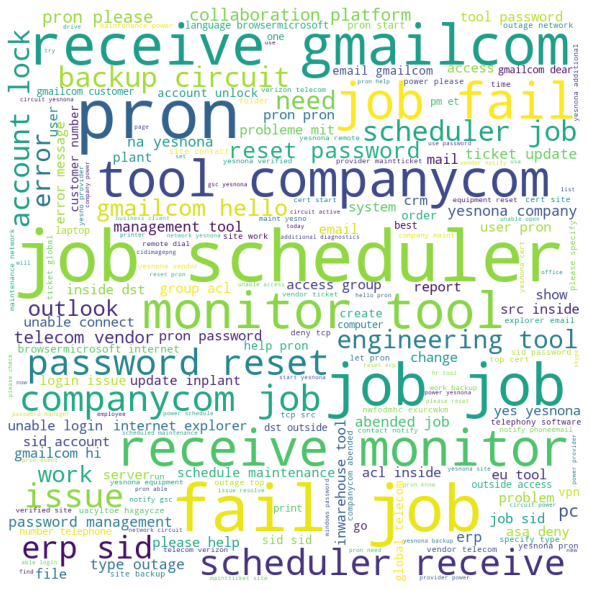

In [62]:
#Let's look at the important words w.r.t to context and frequency
Words=''
stopwords= set(STOPWORDS)

for val in data_clean['Full Description']:
  val=str(val)
  tokens=val.split()
  for i in range(len(tokens)):
    tokens[i]=tokens[i].lower()

  Words+=" ".join(tokens)+ " "

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 5).generate(Words)

wordcloud
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

**MODEL BUILDING**

ML Based Classification Models

In [63]:
#import necessary packages for model building

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

In [64]:
data_clean.shape

(8408, 2)

Using TF-IDF Vectorizer approach

In [65]:
#Split into train and test data into 85 / 15 ratio

X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(
    data_clean['Full Description'].values, data_clean['Assignment group'].values, 
    test_size=0.15, random_state=0)
print('Training utterances: {}'.format(X_train_tf.shape[0]))
print('Validation utterances: {}'.format(X_test_tf.shape[0]))

Training utterances: 7146
Validation utterances: 1262


In [66]:
#Calculating tf-idf scores with unigrams

vectorizer = TfidfVectorizer(ngram_range=(1,1)) # You can still specify n-grams here.
X_train_unigram = vectorizer.fit_transform(X_train_tf)
X_test_unigram = vectorizer.transform(X_test_tf)
X_train_unigram, X_test_unigram

(<7146x11920 sparse matrix of type '<class 'numpy.float64'>'
 	with 140476 stored elements in Compressed Sparse Row format>,
 <1262x11920 sparse matrix of type '<class 'numpy.float64'>'
 	with 23378 stored elements in Compressed Sparse Row format>)

In [67]:
print(vectorizer.vocabulary_)

{'job': 5590, 'fail': 3931, 'in': 5206, 'scheduler': 9104, 'at': 777, 'receive': 8499, 'from': 4272, 'monitor': 6835, 'tool': 10416, 'companycom': 1946, 'printer': 8080, 'problem': 8105, 'issue': 5446, 'information': 5273, 'please': 7889, 'complete': 1982, 'all': 428, 'require': 8684, 'question': 8342, 'below': 1159, 'if': 5135, 'not': 7228, 'pron': 8166, 'will': 11413, 'be': 1100, 'return': 8746, 'back': 996, 'to': 10390, 'the': 10254, 'gsc': 4637, 'requester': 8682, 'provide': 8187, 'review': 8757, 'ticket': 10330, 'able': 90, 'resolve': 8711, 'then': 10262, 'assign': 756, 'appropriate': 672, 'group': 4627, 'per': 7745, 'assignment': 758, 'flowchart': 4139, 'name': 6968, 'make': 6450, 'model': 6809, 'ex': 3811, 'hq': 4969, 'wy': 11567, 'hp': 4965, 'kd': 5735, 'color': 1911, 'laserjet': 6026, 'pcl': 7719, 'detailed': 2702, 'description': 2684, 'of': 7347, 'when': 11366, 'try': 10560, 'send': 9221, 'document': 3002, 'this': 10283, 'say': 9062, 'driver': 3085, 'update': 10763, 'need': 7

In [68]:
#Feature Selection using chi-square test

from sklearn.feature_selection import SelectKBest, chi2

ch2 = SelectKBest(chi2, k=5000)
X_train_unigram = ch2.fit_transform(X_train_unigram, y_train_tf)
X_test_unigram = ch2.transform(X_test_unigram)

X_train_unigram, X_test_unigram

(<7146x5000 sparse matrix of type '<class 'numpy.float64'>'
 	with 121538 stored elements in Compressed Sparse Row format>,
 <1262x5000 sparse matrix of type '<class 'numpy.float64'>'
 	with 20676 stored elements in Compressed Sparse Row format>)

In [69]:
#Naive Bayes classifier with unigrams

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
nbclf_uni = MultinomialNB()
nbclf_uni.fit(X_train_unigram, y_train_tf)
pred = nbclf_uni.predict(X_test_unigram)
print("Train accuracy = ",nbclf_uni.score(X_train_unigram, y_train_tf))
print("Test accuracy = ",nbclf_uni.score(X_test_unigram, y_test_tf))

Train accuracy =  0.570528967254408
Test accuracy =  0.5752773375594294


In [70]:
#Classification_report Naive Bayes classifier with unigrams
print("Classification_report")
print(metrics.classification_report(y_test_tf,pred))

Classification_report
              precision    recall  f1-score   support

       GRP_0       0.57      1.00      0.73       606
      GRP_10       0.00      0.00      0.00        26
      GRP_11       0.00      0.00      0.00         4
      GRP_12       0.73      0.21      0.32        39
      GRP_13       0.00      0.00      0.00        21
      GRP_14       1.00      0.05      0.09        21
      GRP_15       0.00      0.00      0.00         7
      GRP_16       0.00      0.00      0.00        10
      GRP_17       0.00      0.00      0.00        13
      GRP_18       0.00      0.00      0.00        14
      GRP_19       0.00      0.00      0.00        31
       GRP_2       0.60      0.10      0.17        30
      GRP_20       0.00      0.00      0.00         4
      GRP_21       0.00      0.00      0.00         4
      GRP_22       0.00      0.00      0.00         5
      GRP_23       0.00      0.00      0.00         4
      GRP_24       1.00      0.51      0.68        45
     

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
#SVM classifier with unigrams

from sklearn import svm
clf_uni = svm.SVC(gamma=0.025, C=10)    
clf_uni.fit(X_train_unigram , y_train_tf)
pred = clf_uni.predict(X_test_unigram)
print("Train accuracy = ",clf_uni.score(X_train_unigram, y_train_tf))
print("Test accuracy = ",clf_uni.score(X_test_unigram, y_test_tf))

Train accuracy =  0.6648474671144696
Test accuracy =  0.6426307448494454


In [72]:
#Classification_report SVM classifier with unigrams
print("Classification_report")
print(metrics.classification_report(y_test_tf,pred))

Classification_report
              precision    recall  f1-score   support

       GRP_0       0.64      0.99      0.77       606
      GRP_10       1.00      0.23      0.38        26
      GRP_11       0.00      0.00      0.00         4
      GRP_12       0.56      0.38      0.45        39
      GRP_13       0.64      0.43      0.51        21
      GRP_14       0.67      0.19      0.30        21
      GRP_15       0.00      0.00      0.00         7
      GRP_16       0.00      0.00      0.00        10
      GRP_17       0.91      0.77      0.83        13
      GRP_18       0.40      0.14      0.21        14
      GRP_19       0.00      0.00      0.00        31
       GRP_2       0.53      0.30      0.38        30
      GRP_20       0.00      0.00      0.00         4
      GRP_21       0.00      0.00      0.00         4
      GRP_22       0.00      0.00      0.00         5
      GRP_23       0.00      0.00      0.00         4
      GRP_24       0.97      0.73      0.84        45
     

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [73]:
#Decision tree classifier with unigrams

from sklearn.tree import DecisionTreeClassifier
dTree_uni = DecisionTreeClassifier(criterion = 'gini',max_depth = 12,random_state=1)
dTree_uni.fit(X_train_unigram, y_train_tf)
pred = dTree_uni.predict(X_test_unigram)
print("Train accuracy = ",dTree_uni.score(X_train_unigram, y_train_tf))
print("Test accuracy = ",dTree_uni.score(X_test_unigram, y_test_tf))

Train accuracy =  0.6307024909040022
Test accuracy =  0.6093502377179081


In [74]:
#Classification_report Decision tree classifier with unigrams
print("Classification_report")
print(metrics.classification_report(y_test_tf,pred))

Classification_report
              precision    recall  f1-score   support

       GRP_0       0.61      0.97      0.75       606
      GRP_10       0.86      0.23      0.36        26
      GRP_11       0.00      0.00      0.00         4
      GRP_12       0.57      0.41      0.48        39
      GRP_13       0.67      0.29      0.40        21
      GRP_14       0.50      0.24      0.32        21
      GRP_15       0.00      0.00      0.00         7
      GRP_16       0.00      0.00      0.00        10
      GRP_17       0.91      0.77      0.83        13
      GRP_18       0.50      0.07      0.12        14
      GRP_19       0.00      0.00      0.00        31
       GRP_2       0.42      0.17      0.24        30
      GRP_20       0.00      0.00      0.00         4
      GRP_21       0.00      0.00      0.00         4
      GRP_22       0.00      0.00      0.00         5
      GRP_23       0.00      0.00      0.00         4
      GRP_24       0.97      0.69      0.81        45
     

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
#Random Forest classifier with unigrams

from sklearn.ensemble import RandomForestClassifier
rfcl_uni = RandomForestClassifier(n_estimators = 50, random_state=1,max_features = 12)
rfcl_uni = rfcl_uni.fit(X_train_unigram, y_train_tf)
pred = rfcl_uni.predict(X_test_unigram)
print("Train accuracy = ",rfcl_uni.score(X_train_unigram, y_train_tf))
print("Test accuracy = ",rfcl_uni.score(X_test_unigram, y_test_tf))

Train accuracy =  0.9506017352364959
Test accuracy =  0.6410459587955626


In [76]:
#Classification_report Random Forest classifier with unigrams
print("Classification_report")
print(metrics.classification_report(y_test_tf,pred))

Classification_report
              precision    recall  f1-score   support

       GRP_0       0.62      0.99      0.77       606
       GRP_1       0.00      0.00      0.00         0
      GRP_10       1.00      0.23      0.38        26
      GRP_11       0.00      0.00      0.00         4
      GRP_12       0.83      0.26      0.39        39
      GRP_13       0.75      0.14      0.24        21
      GRP_14       0.44      0.19      0.27        21
      GRP_15       0.00      0.00      0.00         7
      GRP_16       0.00      0.00      0.00        10
      GRP_17       0.90      0.69      0.78        13
      GRP_18       1.00      0.07      0.13        14
      GRP_19       0.75      0.10      0.17        31
       GRP_2       0.70      0.23      0.35        30
      GRP_20       0.00      0.00      0.00         4
      GRP_21       0.00      0.00      0.00         4
      GRP_22       0.00      0.00      0.00         5
      GRP_23       0.50      0.25      0.33         4
     

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Using Glove-Embeddings approach

In [77]:
#import necessary packages for model building

from nltk.tokenize import RegexpTokenizer
import numpy as np
import re

In [78]:
#Regular expression based tokenizers to consider only alphabetical sequences and ignore numerical sequences

def complaint_to_words(comp):
    
    words = RegexpTokenizer('\w+').tokenize(comp)
    words = [re.sub(r'([xx]+)|([XX]+)|(\d+)', '', w).lower() for w in words]
    words = list(filter(lambda a: a != '', words))
    
    return words

In [79]:
#Extracing all the unique words from the dataset

all_words = list()
for comp in data_clean['Full Description']:
    for w in complaint_to_words(comp):
        all_words.append(w)

In [80]:
print('Size of vocabulary: {}'.format(len(set(all_words))))

Size of vocabulary: 13045


In [81]:
print('Complaint\n', data_clean['Full Description'][100], '\n')
print('Tokens\n', complaint_to_words(data_clean['Full Description'][100]))

Complaint
 re ess portal access issue receive from   gmailcom hello -PRON- be an kiosk user please reset the password and confirm     gmailcom from    send october to company ticket toolcom subject ess portal access issue hi below mention employee krlszbqo spimolgz with user -PRON- would sv be not able to login to ess portal to access -PRON- pay slip and related content -PRON- be a attendance tool user please reset -PRON- user -PRON- would and password and revert back 

Tokens
 ['re', 'ess', 'portal', 'access', 'issue', 'receive', 'from', 'gmailcom', 'hello', 'pron', 'be', 'an', 'kiosk', 'user', 'please', 'reset', 'the', 'password', 'and', 'confirm', 'gmailcom', 'from', 'send', 'october', 'to', 'company', 'ticket', 'toolcom', 'subject', 'ess', 'portal', 'access', 'issue', 'hi', 'below', 'mention', 'employee', 'krlszbqo', 'spimolgz', 'with', 'user', 'pron', 'would', 'sv', 'be', 'not', 'able', 'to', 'login', 'to', 'ess', 'portal', 'to', 'access', 'pron', 'pay', 'slip', 'and', 'related', 

In [82]:
#Indexing each unique word in the dataset by assigning it a unique number.

index_dict = dict()
count = 1
index_dict['<unk>'] = 0
for word in set(all_words):
    index_dict[word] = count
    count += 1

In [83]:
#Utilizing indexed words to replace words by index

embeddings_index = {}
f = open('/content/drive/MyDrive/Capstone NLP/Data/glove.6B.300d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [84]:
#Taking average of all word embeddings in a sentence to generate the sentence representation

data_list = list()
for comp in data_clean['Full Description']:
    sentence = np.zeros(300)
    count = 0
    for w in complaint_to_words(comp):
        try:
            sentence += embeddings_index[w]
            count += 1
        except KeyError:
            continue
    data_list.append(sentence / count)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


In [85]:
#Converting categrical labels to numerical format and further one hot encoding on the numerical labels.

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data_clean['Assignment group'])
data_clean['Target'] = le.transform(data_clean['Assignment group'])
data_clean.head(10)

Assignment group                                   Full Description  Target
0            GRP_0  login issue verify user detail employee manage...       0
1            GRP_0  outlook receive from   gmailcom hello team -PR...       0
2            GRP_0  can not log in to vpn receive from   gmailcom ...       0
3            GRP_0  unable to access hr tool page unable to access...       0
4            GRP_0                            skype error skype error       0
5            GRP_0  unable to log in to engineering tool and skype...       0
6            GRP_1  event criticalhostname companycom the value of...       1
7            GRP_0  ticket no employment status new non employee e...       0
8            GRP_0  unable to disable add in on outlook unable to ...       0
9            GRP_0  ticket update on inplant ticket update on inplant       0

In [86]:
#since there are few NaNs creating a new dataframe by dropping the rows
my_data = pd.DataFrame(np.array(data_list)) 

In [87]:
my_data.shape

(8408, 300)

In [88]:
my_data['output'] = pd.DataFrame(data_clean.Target.values)

In [89]:
my_data.shape

(8408, 301)

In [90]:
my_data.head()

0         1         2         3  ...       297       298       299  output
0 -0.135278  0.181936 -0.034501 -0.209287  ...  0.001169 -0.141386  0.011633       0
1 -0.107702 -0.101941 -0.111530 -0.078466  ... -0.154871  0.022903  0.048405       0
2 -0.223814  0.121895 -0.251171 -0.124431  ... -0.215780  0.041081  0.067021       0
3 -0.187629 -0.035575 -0.047293 -0.145138  ... -0.144610 -0.077548 -0.029825       0
4 -0.115430  0.247580 -0.081420  0.206040  ... -0.013545 -0.169980 -0.521155       0

[5 rows x 301 columns]

In [91]:
my_new_data = my_data.dropna(how='any')

In [92]:
my_new_data.shape

(8395, 301)

In [93]:
my_new_data.isnull().sum()

0         0
1         0
2         0
3         0
4         0
         ..
296       0
297       0
298       0
299       0
output    0
Length: 301, dtype: int64

In [94]:
#Train--Test split in 85 / 15 ratio
from sklearn.model_selection import train_test_split
X = my_new_data.drop('output',axis=1)
y = my_new_data['output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

In [95]:
#SVM classifier

from sklearn import svm
clf = svm.SVC(gamma=0.025, C=100)    
clf.fit(X_train , y_train)
pred = clf.predict(X_test)
pred_train = clf.predict(X_train)
print('Train:',accuracy_score(y_train, pred_train))
print('Test:', accuracy_score(y_test, pred))

Train: 0.8925017519271198
Test: 0.6658730158730158


In [96]:
#Classification_report SVM classifier
print("Classification_report")
print(metrics.classification_report(y_test,pred))

Classification_report
              precision    recall  f1-score   support

           0       0.74      0.93      0.83       612
           1       0.33      0.33      0.33         3
           2       0.60      0.45      0.51        20
           3       0.00      0.00      0.00         2
           4       0.61      0.61      0.61        41
           5       0.38      0.26      0.31        23
           6       0.30      0.18      0.22        17
           7       0.33      0.17      0.22         6
           8       0.43      0.33      0.38         9
           9       0.91      0.91      0.91        11
          10       0.45      0.42      0.43        12
          11       0.40      0.19      0.26        32
          12       0.59      0.53      0.56        32
          13       0.20      0.17      0.18         6
          14       0.00      0.00      0.00         8
          15       0.50      0.20      0.29         5
          16       0.60      1.00      0.75         3
     

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [97]:
#Decision tree classifier

from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier(criterion = 'gini',max_depth = 9,random_state=1)
dTree.fit(X_train, y_train)
pred = dTree.predict(X_test)
print('Train:',dTree.score(X_train, y_train))
print('Test:',dTree.score(X_test, y_test))

Train: 0.6227049754730203
Test: 0.5587301587301587


In [98]:
#Classification_report Decision tree classifier
print("Classification_report")
print(metrics.classification_report(y_test,pred))

Classification_report
              precision    recall  f1-score   support

           0       0.63      0.90      0.74       612
           1       0.00      0.00      0.00         3
           2       0.55      0.30      0.39        20
           3       0.00      0.00      0.00         2
           4       0.24      0.17      0.20        41
           5       0.00      0.00      0.00        23
           6       0.14      0.06      0.08        17
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         9
           9       0.67      0.36      0.47        11
          10       0.00      0.00      0.00        12
          11       0.09      0.03      0.05        32
          12       0.39      0.28      0.33        32
          13       0.00      0.00      0.00         6
          14       0.00      0.00      0.00         8
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00         3
     

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [99]:
#Random Forest classifier

from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features = 12)
rfcl = rfcl.fit(X_train, y_train)
pred = rfcl.predict(X_test)
print('Train:', rfcl.score(X_train, y_train))
print('Test:', rfcl.score(X_test, y_test))

Train: 0.9516468114926419
Test: 0.6142857142857143


In [100]:
#Classification_report Random Forest classifier
print("Classification_report")
print(metrics.classification_report(y_test,pred))

Classification_report
              precision    recall  f1-score   support

           0       0.61      0.99      0.75       612
           1       0.50      0.33      0.40         3
           2       1.00      0.25      0.40        20
           3       0.00      0.00      0.00         2
           4       0.67      0.34      0.45        41
           5       0.50      0.04      0.08        23
           6       0.00      0.00      0.00        17
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         9
           9       1.00      0.45      0.62        11
          10       1.00      0.08      0.15        12
          11       1.00      0.03      0.06        32
          12       0.69      0.28      0.40        32
          13       0.00      0.00      0.00         6
          14       0.00      0.00      0.00         8
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00         3
     

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AI- Based Classification Models(Deep Learning)

In [101]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout, Flatten, Bidirectional, GlobalMaxPool1D, TimeDistributed, BatchNormalization, Activation, Input, Conv1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Model, Sequential
from tensorflow.keras.initializers import Constant
from tensorflow.keras import optimizers
from keras.layers import PReLU
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Concatenate

In [102]:
#Initialize variables

max_features = 10000
embedding_size = 500
max_len=200
batch_size=64
epochs=20

In [103]:
tokenizer=Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(data_clean['Full Description'].values)       
sequences = tokenizer.texts_to_sequences(data_clean['Full Description'].values)     

In [104]:
X_nn=tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_len)
Y_nn = pd.get_dummies(data_clean['Assignment group']).values   

In [105]:
print('Shape of input tensor:', X_nn.shape)

Shape of input tensor: (8408, 200)


In [106]:
print('Shape of label tensor:', Y_nn.shape)

Shape of label tensor: (8408, 74)


In [107]:
X_nn[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,  49,  30, 545,  26,
       170, 195, 128,  63,  91,   4,  26,  63,   5, 233,  12,  2

In [108]:
Y_nn[0]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [109]:
from sklearn.model_selection import train_test_split
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_nn,Y_nn, test_size = 0.15, random_state = 42)
print(X_train_nn.shape,y_train_nn.shape)
print(X_test_nn.shape,y_test_nn.shape)

(7146, 200) (7146, 74)
(1262, 200) (1262, 74)


In [110]:
tokenizer.word_index

{'to': 1,
 'pron': 2,
 'be': 3,
 'the': 4,
 'in': 5,
 'job': 6,
 'not': 7,
 'from': 8,
 'a': 9,
 'on': 10,
 'tool': 11,
 'and': 12,
 'for': 13,
 'receive': 14,
 'password': 15,
 'i': 16,
 'at': 17,
 'please': 18,
 'erp': 19,
 'have': 20,
 'scheduler': 21,
 'gmailcom': 22,
 'of': 23,
 'fail': 24,
 'sid': 25,
 'user': 26,
 'yesnona': 27,
 'reset': 28,
 'this': 29,
 'issue': 30,
 'unable': 31,
 'access': 32,
 'can': 33,
 'do': 34,
 'account': 35,
 'no': 36,
 'company': 37,
 'work': 38,
 'with': 39,
 'ticket': 40,
 'companycom': 41,
 'monitor': 42,
 'error': 43,
 'need': 44,
 'hostname': 45,
 'email': 46,
 'outlook': 47,
 'would': 48,
 'login': 49,
 'that': 50,
 'site': 51,
 'help': 52,
 'get': 53,
 'as': 54,
 'system': 55,
 'update': 56,
 'when': 57,
 'e': 58,
 'circuit': 59,
 'power': 60,
 'lock': 61,
 'network': 62,
 'name': 63,
 'use': 64,
 'change': 65,
 'hello': 66,
 'an': 67,
 'vendor': 68,
 'but': 69,
 'event': 70,
 'or': 71,
 'if': 72,
 'server': 73,
 'connect': 74,
 'by': 75,
 'd

In [111]:
num_words = len(tokenizer.word_index) + 1
print(num_words)

13143


In [112]:
EMBEDDING_FILE_100 ='/content/drive/MyDrive/Capstone NLP/Data/glove.6B.100d.txt'
EMBEDDING_FILE_200 ='/content/drive/MyDrive/Capstone NLP/Data/glove.6B.200d.txt'
EMBEDDING_FILE_300 ='/content/drive/MyDrive/Capstone NLP/Data/glove.6B.300d.txt'

def GenerateEmbeddings(EMBEDDING_FILE, emb_size):

  embeddings = {}
  for o in open(EMBEDDING_FILE):
      word = o.split(" ")[0]
      # print(word)
      embd = o.split(" ")[1:]
      embd = np.asarray(embd, dtype='float32')
      # print(embd)
      embeddings[word] = embd

  # create a weight matrix for words in training docs
  embedding_matrix = np.zeros((num_words, emb_size))

  for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector
    
    return embedding_matrix

In [113]:
emb_100 = GenerateEmbeddings(EMBEDDING_FILE_100, 100)
emb_200 = GenerateEmbeddings(EMBEDDING_FILE_200, 200)
emb_300 = GenerateEmbeddings(EMBEDDING_FILE_300, 300)

In [114]:
#Model Evaluation
def EvalulateModel(model, Xtest, ytest):
  loss_nn, accuracy_nn = model.evaluate(Xtest, ytest, verbose=0)
  print('Test data:')
  print('Overall Accuracy: {}'.format(round(accuracy_nn*100, 2)))
  print('Overall Loss: {}'.format(round(loss_nn*100, 2)))

In [115]:
#Define callbacks
es = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=0)
mc = ModelCheckpoint('autoticketassign.h5', monitor='val_loss', mode='min', save_best_only=True, verbose=0)
lr_r=ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=0)
logdir='log'
tb=TensorBoard(logdir, histogram_freq=1)
callbacks = [es, mc,lr_r, tb]

In [116]:
def RunClassifier(model, X_train, X_test, y_train, y_test, opt):
  print(model.summary())
  if opt.lower() == 'adam':
    model.compile(optimizer=optimizers.Adam(learning_rate=0.001),loss="categorical_crossentropy",metrics=['accuracy'])
  else:
    model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),loss="categorical_crossentropy",metrics=['accuracy'])

  h=model.fit(X_train, y_train, epochs=epochs, validation_split=0.2,
       batch_size=batch_size, verbose=0, callbacks = callbacks)

  print('Training Accuracy:', model.evaluate(X_train, y_train)[1]*100)
  EvalulateModel(model, X_test, y_test)

  PlotAccAndLoss(h)


In [117]:
#Method to plot Train Vs. Validation Accuray and Loss
def PlotAccAndLoss(h):
  #Summarize history for accuracy

  plt.plot(h.history['accuracy'])
  plt.plot(h.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train, test'], loc='upper left')
  plt.show()
  plt.savefig('model_accuracy.png')

  #Summarize history for accuracy

  plt.plot(h.history['loss'])
  plt.plot(h.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train, test'], loc='upper left')
  plt.show()
  plt.savefig('model_loss.png')

Dense Neural Network

In [118]:
dnn = Sequential()
dnn.add(Dense(512, input_shape=(X_train_nn.shape[1],), kernel_initializer='he_normal'))
dnn.add(BatchNormalization())
dnn.add(Activation('relu'))
dnn.add(Dropout(0.3))
dnn.add(Dense(512, kernel_initializer='he_normal'))
dnn.add(BatchNormalization())
dnn.add(Activation('relu'))
dnn.add(Dropout(0.3))
dnn.add(Dense(512, kernel_initializer='he_normal'))
dnn.add(BatchNormalization())
dnn.add(Activation('relu'))
dnn.add(Dropout(0.3))
dnn.add(Dense(512, kernel_initializer='he_normal'))
dnn.add(BatchNormalization())
dnn.add(Activation('relu'))
dnn.add(Dropout(0.3))
dnn.add(Dense(74, activation='softmax'))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               102912    
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0

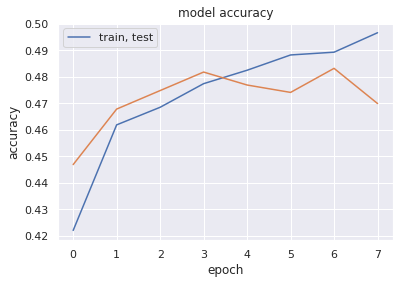

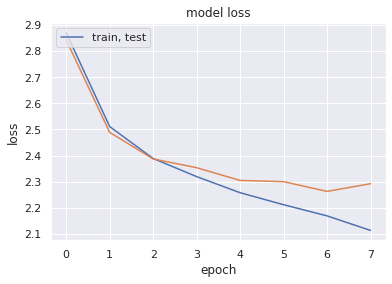

<Figure size 432x288 with 0 Axes>

In [119]:
RunClassifier(dnn, X_train_nn, X_test_nn, y_train_nn, y_test_nn, 'Adam')

Convolutional Neural Network

In [120]:
# Build CNN Model

def Build_Model_CNN_Text(word_index, embeddings_matrix, nclasses,dropout=0.5):
    """
        def buildModel_CNN(word_index, embeddings_index, nclasses, MAX_SEQUENCE_LENGTH=500, EMBEDDING_DIM=50, dropout=0.5):
        word_index in word index ,
        embeddings_index is embeddings index, look at data_helper.py
        nClasses is number of classes,
        MAX_SEQUENCE_LENGTH is maximum lenght of text sequences,
        EMBEDDING_DIM is an int value for dimention of word embedding look at data_helper.py
    """
    model = Sequential()
    embedding_layer = Embedding(len(word_index) + 1,
                                300,
                                weights=[embeddings_matrix],
                                input_length=max_len,
                                trainable=True)
    # applying a more complex convolutional approach
    convs = []
    filter_sizes = []
    layer = 5
    print("Filter  ",layer)
    for fl in range(0,layer):
        filter_sizes.append((fl+2))
    node = 128
    sequence_input = Input(shape=(max_len,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)
    for fsz in filter_sizes:
        l_conv = Conv1D(node, kernel_size=fsz, activation='relu')(embedded_sequences)
        l_pool = MaxPooling1D(5)(l_conv)
        #l_pool = Dropout(0.25)(l_pool)
        convs.append(l_pool)
    l_merge = Concatenate(axis=1)(convs)
    l_cov1 = Conv1D(node, 5, activation='relu')(l_merge)
    l_cov1 = Dropout(dropout)(l_cov1)
    l_batch1 = BatchNormalization()(l_cov1)
    l_pool1 = MaxPooling1D(5)(l_batch1)
    l_cov2 = Conv1D(node, 5, activation='relu')(l_pool1)
    l_cov2 = Dropout(dropout)(l_cov2)
    l_batch2 = BatchNormalization()(l_cov2)
    l_pool2 = MaxPooling1D(30)(l_batch2)
    l_flat = Flatten()(l_pool2)
    l_dense = Dense(1024, activation='relu')(l_flat)
    l_dense = Dropout(dropout)(l_dense)
    l_dense = Dense(512, activation='relu')(l_dense)
    l_dense = Dropout(dropout)(l_dense)
    preds = Dense(nclasses, activation='softmax')(l_dense)
    model = Model(sequence_input, preds)
    return model

Filter   5
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 200)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 200, 300)     3942900     input_1[0][0]                    
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 199, 128)     76928       embedding[0][0]                  
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 198, 128)     115328      embedding[0][0]                  
___________________________________________________________________________________

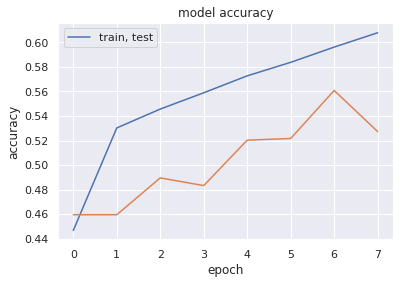

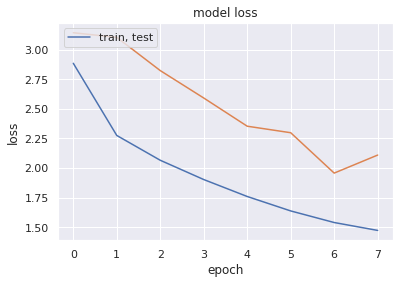

<Figure size 432x288 with 0 Axes>

In [121]:
# Train the network and run classification
cnn = Build_Model_CNN_Text(tokenizer.word_index,emb_300, 74)
RunClassifier(cnn, X_train_nn, X_test_nn, y_train_nn, y_test_nn, 'Adam')

RNN Based LSTM

In [138]:
# LSTM Model
# Let's build a simple LSTM Model

lstm = Sequential()
lstm.add(Embedding(num_words, 100, input_length = max_len, trainable = True, embeddings_initializer=Constant(emb_100),))
lstm.add(Bidirectional(LSTM(256, return_sequences=True,)))
lstm.add(GlobalMaxPool1D())
lstm.add(Dense(512, kernel_initializer='uniform'))
lstm.add(Activation('relu'))
lstm.add(Dropout(0.5, input_shape=(128,)))
lstm.add(Dense(512, kernel_initializer='uniform'))
lstm.add(Activation('relu'))
lstm.add(Dropout(0.5, input_shape=(128,)))
lstm.add(Dense(512, kernel_initializer='uniform'))
lstm.add(Activation('relu'))
lstm.add(Dropout(0.5, input_shape=(128,)))
lstm.add(Dense(74, activation='softmax'))

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 200, 100)          1314300   
_________________________________________________________________
bidirectional_5 (Bidirection (None, 200, 512)          731136    
_________________________________________________________________
global_max_pooling1d_5 (Glob (None, 512)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 512)               262656    
_________________________________________________________________
activation_19 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 512)              

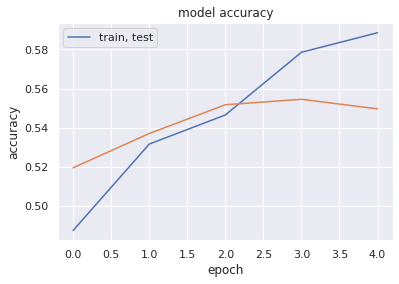

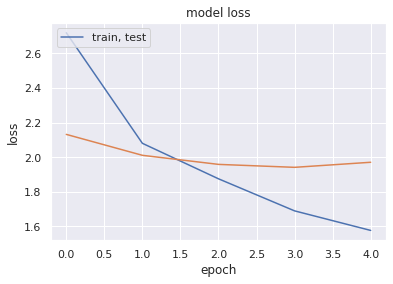

<Figure size 432x288 with 0 Axes>

In [139]:
RunClassifier(lstm, X_train_nn, X_test_nn, y_train_nn, y_test_nn, 'Adam')

In [140]:
# #Simple LSTM Model
simple_lstm = Sequential()
simple_lstm.add(Embedding(num_words, 100, trainable = True))
simple_lstm.add(LSTM(128, recurrent_dropout=0.3, dropout=0.2))
simple_lstm.add(Dense(64, activation='relu'))
simple_lstm.add(Dense(74, activation='softmax'))

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, None, 100)         1314300   
_________________________________________________________________
lstm_8 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_36 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_37 (Dense)             (None, 74)                4810      
Total params: 1,444,614
Trainable params: 1,444,614
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
90/90 [==============================] - 89s 965ms/step - loss: 3.2399 - accuracy: 0.4287 - val_loss: 2.3358 - val_accuracy: 0.5259
Epoch 2/20
90/90 [==============================] - 83s 919ms/step - loss: 2.2144 - accuracy:

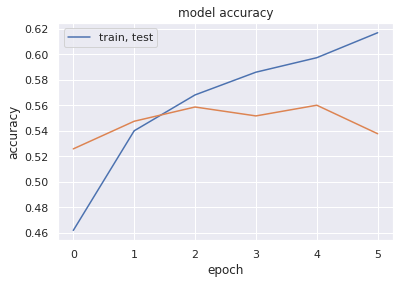

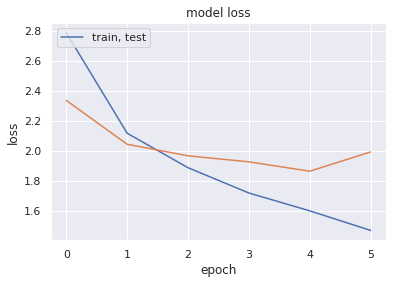

<Figure size 432x288 with 0 Axes>

In [141]:
#RunClassifier(simple_lstm, X_train_nn, X_test_nn, y_train_nn, y_test_nn, 'Adam')
print(simple_lstm.summary())
simple_lstm.compile(optimizer=optimizers.Adam(learning_rate=0.001),loss="categorical_crossentropy",metrics=['accuracy'])
h=simple_lstm.fit(X_train_nn, y_train_nn, epochs=epochs, validation_split=0.2,
       batch_size=batch_size, verbose=1, callbacks = callbacks)

print('Training Accuracy:', simple_lstm.evaluate(X_train_nn, y_train_nn)[1]*100)
EvalulateModel(simple_lstm, X_test_nn, y_test_nn)

PlotAccAndLoss(h)

**Improve the model performance by hyper tuning**

1. Try glove embeddings with size 100, 200 and 300
2. Try to learn embeddings instead of using glove embeddings
3. For LSTM Model, try unidirectional as well as bidirectional LSTM
4. For LSTM Model, try different no. of LSTM layers. Try with different no. of LSTM units like 64, 128, 256 etc. in each layer of the LSTM architecture
5. Try different optimizers like Adam, RMS Prop by varying the learning rate
6. Try different activation functions like ReLu, P-ReLu, Leaky ReLu etc
7. Try working with data belonging to top 5 and top 10 groups to address the class imbalance issue
8. Try including Caller information in the input dataset.

TF-IDF Vectorizer using bigrams

In [142]:
#Calculating tf-idf scores with bigrams

vectorizer = TfidfVectorizer(ngram_range=(2,2)) # You can still specify n-grams here.
X_train_bigram = vectorizer.fit_transform(X_train_tf)
X_test_bigram = vectorizer.transform(X_test_tf)
X_train_bigram, X_test_bigram

(<7146x63095 sparse matrix of type '<class 'numpy.float64'>'
 	with 178573 stored elements in Compressed Sparse Row format>,
 <1262x63095 sparse matrix of type '<class 'numpy.float64'>'
 	with 23484 stored elements in Compressed Sparse Row format>)

In [143]:
print(vectorizer.vocabulary_)

{'job job': 28672, 'job fail': 28659, 'fail in': 19453, 'in job': 26477, 'job scheduler': 28694, 'scheduler at': 47116, 'at receive': 4674, 'receive from': 44526, 'from monitor': 21734, 'monitor tool': 33350, 'tool companycom': 56266, 'companycom job': 10783, 'printer problem': 41827, 'problem issue': 41997, 'issue information': 28157, 'information please': 27192, 'please complete': 40682, 'complete all': 10913, 'all require': 1993, 'require question': 45554, 'question below': 43963, 'below if': 6992, 'if not': 25979, 'not pron': 35586, 'pron will': 43347, 'will be': 61011, 'be return': 6550, 'return back': 45978, 'back to': 5545, 'to the': 55970, 'the gsc': 53389, 'gsc requester': 23474, 'requester to': 45515, 'to provide': 55770, 'provide require': 43467, 'require information': 45542, 'information gsc': 27175, 'gsc to': 23475, 'to review': 55846, 'review ticket': 46056, 'ticket if': 54808, 'not able': 35355, 'able to': 175, 'to resolve': 55836, 'resolve then': 45768, 'then please': 5

In [144]:
#Feature Selection using chi-square test

from sklearn.feature_selection import SelectKBest, chi2

ch2 = SelectKBest(chi2, k=5000)
X_train_bigram = ch2.fit_transform(X_train_bigram, y_train_tf)
X_test_bigram = ch2.transform(X_test_bigram)

X_train_bigram, X_test_bigram

(<7146x5000 sparse matrix of type '<class 'numpy.float64'>'
 	with 37822 stored elements in Compressed Sparse Row format>,
 <1262x5000 sparse matrix of type '<class 'numpy.float64'>'
 	with 5336 stored elements in Compressed Sparse Row format>)

In [145]:
#Naive Bayes classifier with bigrams

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
nbclf_bi = MultinomialNB()
nbclf_bi.fit(X_train_bigram, y_train_tf)
pred = nbclf_bi.predict(X_test_bigram)
print("Train accuracy = ",nbclf_bi.score(X_train_bigram, y_train_tf))
print("Test accuracy = ",nbclf_bi.score(X_test_bigram, y_test_tf))

Train accuracy =  0.5454799888049259
Test accuracy =  0.5618066561014263


In [146]:
#Classification_report SVM classifier with bigrams
print("Classification_report")
print(metrics.classification_report(y_test_tf,pred))

Classification_report
              precision    recall  f1-score   support

       GRP_0       0.56      1.00      0.72       606
      GRP_10       0.00      0.00      0.00        26
      GRP_11       0.00      0.00      0.00         4
      GRP_12       0.83      0.13      0.22        39
      GRP_13       0.00      0.00      0.00        21
      GRP_14       0.00      0.00      0.00        21
      GRP_15       0.00      0.00      0.00         7
      GRP_16       0.00      0.00      0.00        10
      GRP_17       0.00      0.00      0.00        13
      GRP_18       0.00      0.00      0.00        14
      GRP_19       0.00      0.00      0.00        31
       GRP_2       1.00      0.10      0.18        30
      GRP_20       0.00      0.00      0.00         4
      GRP_21       0.00      0.00      0.00         4
      GRP_22       0.00      0.00      0.00         5
      GRP_23       0.00      0.00      0.00         4
      GRP_24       1.00      0.27      0.42        45
     

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [147]:
#SVM classifier with bigrams

from sklearn import svm
clf_bi = svm.SVC(gamma=0.025, C=10)    
clf_bi.fit(X_train_bigram , y_train_tf)
pred = clf_bi.predict(X_test_bigram)
print("Train accuracy = ",clf_bi.score(X_train_bigram, y_train_tf))
print("Test accuracy = ",clf_bi.score(X_test_bigram, y_test_tf))

Train accuracy =  0.5870417016512735
Test accuracy =  0.6022187004754358


In [148]:
#Classification_report SVM classifier with bigrams
print("Classification_report")
print(metrics.classification_report(y_test_tf,pred))

Classification_report
              precision    recall  f1-score   support

       GRP_0       0.58      1.00      0.73       606
      GRP_10       1.00      0.23      0.38        26
      GRP_11       0.00      0.00      0.00         4
      GRP_12       0.67      0.15      0.25        39
      GRP_13       1.00      0.29      0.44        21
      GRP_14       1.00      0.05      0.09        21
      GRP_15       0.00      0.00      0.00         7
      GRP_16       0.00      0.00      0.00        10
      GRP_17       0.91      0.77      0.83        13
      GRP_18       0.00      0.00      0.00        14
      GRP_19       0.00      0.00      0.00        31
       GRP_2       1.00      0.20      0.33        30
      GRP_20       0.00      0.00      0.00         4
      GRP_21       0.00      0.00      0.00         4
      GRP_22       0.00      0.00      0.00         5
      GRP_23       0.00      0.00      0.00         4
      GRP_24       0.96      0.53      0.69        45
     

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [149]:
#Decision tree classifier with bigrams

from sklearn.tree import DecisionTreeClassifier
dTree_bi = DecisionTreeClassifier(criterion = 'gini',max_depth = 12,random_state=1)
dTree_bi.fit(X_train_bigram, y_train_tf)
pred = dTree_bi.predict(X_test_bigram)
print("Train accuracy = ",dTree_bi.score(X_train_bigram, y_train_tf))
print("Test accuracy = ",dTree_bi.score(X_test_bigram, y_test_tf))

Train accuracy =  0.5888609012034705
Test accuracy =  0.5942947702060222


In [150]:
#Classification_report Decision tree classifier with bigrams
print("Classification_report")
print(metrics.classification_report(y_test_tf,pred))

Classification_report
              precision    recall  f1-score   support

       GRP_0       0.58      0.99      0.73       606
      GRP_10       1.00      0.23      0.38        26
      GRP_11       0.00      0.00      0.00         4
      GRP_12       0.00      0.00      0.00        39
      GRP_13       0.00      0.00      0.00        21
      GRP_14       0.67      0.10      0.17        21
      GRP_15       0.00      0.00      0.00         7
      GRP_16       0.00      0.00      0.00        10
      GRP_17       0.83      0.77      0.80        13
      GRP_18       0.00      0.00      0.00        14
      GRP_19       0.00      0.00      0.00        31
       GRP_2       0.00      0.00      0.00        30
      GRP_20       0.00      0.00      0.00         4
      GRP_21       0.00      0.00      0.00         4
      GRP_22       0.00      0.00      0.00         5
      GRP_23       0.00      0.00      0.00         4
      GRP_24       0.96      0.49      0.65        45
     

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [151]:
#Random Forest classifier with bigrams

from sklearn.ensemble import RandomForestClassifier
rfcl_bi = RandomForestClassifier(n_estimators = 50, random_state=1,max_features = 12)
rfcl_bi.fit(X_train_bigram, y_train_tf)
pred = rfcl_bi.predict(X_test_bigram)
print("Train accuracy = ",rfcl_bi.score(X_train_bigram, y_train_tf))
print("Test accuracy = ",rfcl_bi.score(X_test_bigram, y_test_tf))

Train accuracy =  0.8877693814721522
Test accuracy =  0.6220285261489699


In [152]:
#Classification_report Random Forest classifier with bigrams
print("Classification_report")
print(metrics.classification_report(y_test_tf,pred))

Classification_report
              precision    recall  f1-score   support

       GRP_0       0.66      0.93      0.77       606
       GRP_1       0.00      0.00      0.00         0
      GRP_10       0.90      0.35      0.50        26
      GRP_11       0.00      0.00      0.00         4
      GRP_12       0.55      0.31      0.39        39
      GRP_13       0.32      0.33      0.33        21
      GRP_14       0.36      0.19      0.25        21
      GRP_15       0.00      0.00      0.00         7
      GRP_16       0.25      0.10      0.14        10
      GRP_17       0.91      0.77      0.83        13
      GRP_18       0.67      0.14      0.24        14
      GRP_19       0.29      0.16      0.21        31
       GRP_2       0.41      0.23      0.30        30
      GRP_20       0.00      0.00      0.00         4
      GRP_21       0.00      0.00      0.00         4
      GRP_22       1.00      0.20      0.33         5
      GRP_23       0.33      0.25      0.29         4
     

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TF-IDF Vectorizer using trigrams

In [153]:
#Calculating tf-idf scores with Trigrams

vectorizer = TfidfVectorizer(ngram_range=(3,3)) # You can still specify n-grams here.
X_train_trigram = vectorizer.fit_transform(X_train_tf)
X_test_trigram = vectorizer.transform(X_test_tf)
X_train_trigram, X_test_trigram   

(<7146x105620 sparse matrix of type '<class 'numpy.float64'>'
 	with 183920 stored elements in Compressed Sparse Row format>,
 <1262x105620 sparse matrix of type '<class 'numpy.float64'>'
 	with 16785 stored elements in Compressed Sparse Row format>)

In [154]:
print(vectorizer.vocabulary_)

{'job job fail': 46392, 'job fail in': 46363, 'fail in job': 30931, 'in job scheduler': 42579, 'job scheduler at': 46425, 'scheduler at receive': 77409, 'at receive from': 7588, 'receive from monitor': 73686, 'from monitor tool': 34701, 'monitor tool companycom': 53095, 'tool companycom job': 95112, 'companycom job job': 18229, 'printer problem issue': 67995, 'problem issue information': 68233, 'issue information please': 45582, 'information please complete': 43988, 'please complete all': 66083, 'complete all require': 18381, 'all require question': 3155, 'require question below': 75185, 'question below if': 72948, 'below if not': 12390, 'if not pron': 41636, 'not pron will': 57031, 'pron will be': 71938, 'will be return': 102506, 'be return back': 11352, 'return back to': 75842, 'back to the': 8802, 'to the gsc': 94345, 'the gsc requester': 87595, 'gsc requester to': 37536, 'requester to provide': 75124, 'to provide require': 93697, 'provide require information': 72348, 'require infor

In [155]:
#Feature Selection using chi-square test

from sklearn.feature_selection import SelectKBest, chi2

ch2 = SelectKBest(chi2, k=5000)
X_train_trigram = ch2.fit_transform(X_train_trigram, y_train_tf)
X_test_trigram = ch2.transform(X_test_trigram)

X_train_trigram, X_test_trigram

(<7146x5000 sparse matrix of type '<class 'numpy.float64'>'
 	with 27851 stored elements in Compressed Sparse Row format>,
 <1262x5000 sparse matrix of type '<class 'numpy.float64'>'
 	with 3532 stored elements in Compressed Sparse Row format>)

In [156]:
#Naive Bayes classifier with Trigrams

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
nbclf_tri = MultinomialNB()
nbclf_tri.fit(X_train_trigram, y_train_tf)
pred = nbclf_tri.predict(X_test_trigram)
print("Train accuracy = ",nbclf_tri.score(X_train_trigram, y_train_tf))
print("Test accuracy = ",nbclf_tri.score(X_test_trigram, y_test_tf))

Train accuracy =  0.5435208508256367
Test accuracy =  0.5586370839936609


In [157]:
#Classification_report Naive Bayes classifier with Trigrams
print("Classification_report")
print(metrics.classification_report(y_test_tf,pred))

Classification_report
              precision    recall  f1-score   support

       GRP_0       0.55      1.00      0.71       606
      GRP_10       1.00      0.19      0.32        26
      GRP_11       0.00      0.00      0.00         4
      GRP_12       1.00      0.08      0.14        39
      GRP_13       0.00      0.00      0.00        21
      GRP_14       0.00      0.00      0.00        21
      GRP_15       0.00      0.00      0.00         7
      GRP_16       0.00      0.00      0.00        10
      GRP_17       0.00      0.00      0.00        13
      GRP_18       0.00      0.00      0.00        14
      GRP_19       0.00      0.00      0.00        31
       GRP_2       1.00      0.07      0.12        30
      GRP_20       0.00      0.00      0.00         4
      GRP_21       0.00      0.00      0.00         4
      GRP_22       0.00      0.00      0.00         5
      GRP_23       0.00      0.00      0.00         4
      GRP_24       1.00      0.09      0.16        45
     

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [158]:
#SVM classifier with Trigrams

from sklearn import svm
clf_tri = svm.SVC(gamma=0.025, C=10)    
clf_tri.fit(X_train_trigram , y_train_tf)
pred = clf_tri.predict(X_test_trigram)
print("Train accuracy = ",clf_tri.score(X_train_trigram, y_train_tf))
print("Test accuracy = ",clf_tri.score(X_test_trigram, y_test_tf))

Train accuracy =  0.561572907920515
Test accuracy =  0.5792393026941363


In [159]:
#Classification_report SVM classifier with Trigrams
print("Classification_report")
print(metrics.classification_report(y_test_tf,pred))

Classification_report
              precision    recall  f1-score   support

       GRP_0       0.56      1.00      0.72       606
      GRP_10       1.00      0.23      0.38        26
      GRP_11       0.00      0.00      0.00         4
      GRP_12       0.62      0.13      0.21        39
      GRP_13       0.00      0.00      0.00        21
      GRP_14       0.00      0.00      0.00        21
      GRP_15       0.00      0.00      0.00         7
      GRP_16       0.00      0.00      0.00        10
      GRP_17       0.91      0.77      0.83        13
      GRP_18       0.00      0.00      0.00        14
      GRP_19       0.00      0.00      0.00        31
       GRP_2       1.00      0.17      0.29        30
      GRP_20       0.00      0.00      0.00         4
      GRP_21       0.00      0.00      0.00         4
      GRP_22       0.00      0.00      0.00         5
      GRP_23       0.00      0.00      0.00         4
      GRP_24       1.00      0.24      0.39        45
     

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [160]:
#Decision tree classifier with Trigrams

from sklearn.tree import DecisionTreeClassifier
dTree_tri = DecisionTreeClassifier(criterion = 'gini',max_depth = 12,random_state=1)
dTree_tri.fit(X_train_trigram, y_train_tf)
pred = dTree_tri.predict(X_test_trigram)
print("Train accuracy = ",dTree_tri.score(X_train_trigram, y_train_tf))
print("Test accuracy = ",dTree_tri.score(X_test_trigram, y_test_tf))

Train accuracy =  0.5824237335572349
Test accuracy =  0.5784469096671949


In [161]:
#Classification_report Decision tree classifier with Trigrams
print("Classification_report")
print(metrics.classification_report(y_test_tf,pred))

Classification_report
              precision    recall  f1-score   support

       GRP_0       0.56      1.00      0.72       606
      GRP_10       1.00      0.23      0.38        26
      GRP_11       0.00      0.00      0.00         4
      GRP_12       0.67      0.15      0.25        39
      GRP_13       0.00      0.00      0.00        21
      GRP_14       0.00      0.00      0.00        21
      GRP_15       0.00      0.00      0.00         7
      GRP_16       0.00      0.00      0.00        10
      GRP_17       0.78      0.54      0.64        13
      GRP_18       0.00      0.00      0.00        14
      GRP_19       0.00      0.00      0.00        31
       GRP_2       0.78      0.23      0.36        30
      GRP_20       0.00      0.00      0.00         4
      GRP_21       0.00      0.00      0.00         4
      GRP_22       0.00      0.00      0.00         5
      GRP_23       0.00      0.00      0.00         4
      GRP_24       1.00      0.13      0.24        45
     

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [162]:
#Random Forest classifier with Trigrams

from sklearn.ensemble import RandomForestClassifier
rfcl_tri = RandomForestClassifier(n_estimators = 50, random_state=1,max_features = 12)
rfcl_tri.fit(X_train_trigram, y_train_tf)
pred = rfcl_tri.predict(X_test_trigram)
print("Train accuracy = ",rfcl_tri.score(X_train_trigram, y_train_tf))
print("Test accuracy = ",rfcl_tri.score(X_test_trigram, y_test_tf))

Train accuracy =  0.7314581584102995
Test accuracy =  0.5935023771790808


In [163]:
#Classification_report Random Forest classifier with Trigrams
print("Classification_report")
print(metrics.classification_report(y_test_tf,pred))

Classification_report
              precision    recall  f1-score   support

       GRP_0       0.60      0.96      0.74       606
       GRP_1       0.00      0.00      0.00         0
      GRP_10       0.78      0.27      0.40        26
      GRP_11       0.00      0.00      0.00         4
      GRP_12       0.56      0.23      0.33        39
      GRP_13       0.50      0.14      0.22        21
      GRP_14       0.33      0.14      0.20        21
      GRP_15       0.00      0.00      0.00         7
      GRP_16       0.00      0.00      0.00        10
      GRP_17       0.93      1.00      0.96        13
      GRP_18       1.00      0.07      0.13        14
      GRP_19       0.00      0.00      0.00        31
       GRP_2       0.58      0.23      0.33        30
      GRP_20       0.00      0.00      0.00         4
      GRP_21       0.25      0.25      0.25         4
      GRP_22       1.00      0.20      0.33         5
      GRP_23       0.00      0.00      0.00         4
     

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [164]:
tfidf_metrics = {'Classifier':['Naive Bayes','SVM','Decision Tree','Random Forest','Naive Bayes','SVM','Decision Tree','Random Forest',
                               'Naive Bayes','SVM','Decision Tree','Random Forest'],
                 'n-gram':['Unigram','Unigram','Unigram','Unigram','Bigram','Bigram','Bigram','Bigram','Trigram','Trigram','Trigram','Trigram'],
                 'Training Accuracy':[nbclf_uni.score(X_train_unigram, y_train_tf),clf_uni.score(X_train_unigram, y_train_tf),dTree_uni.score(X_train_unigram, y_train_tf),rfcl_uni.score(X_train_unigram, y_train_tf),
                                      nbclf_bi.score(X_train_bigram, y_train_tf),clf_bi.score(X_train_bigram, y_train_tf),dTree_bi.score(X_train_bigram, y_train_tf),rfcl_bi.score(X_train_bigram, y_train_tf),
                                      nbclf_tri.score(X_train_trigram, y_train_tf),clf_tri.score(X_train_trigram, y_train_tf),dTree_tri.score(X_train_trigram, y_train_tf),rfcl_tri.score(X_train_trigram, y_train_tf)],
                 'Test Accuracy':[nbclf_uni.score(X_test_unigram, y_test_tf),clf_uni.score(X_test_unigram, y_test_tf),dTree_uni.score(X_test_unigram, y_test_tf),rfcl_uni.score(X_test_unigram, y_test_tf),
                                      nbclf_bi.score(X_test_bigram, y_test_tf),clf_bi.score(X_test_bigram, y_test_tf),dTree_bi.score(X_test_bigram, y_test_tf),rfcl_bi.score(X_test_bigram, y_test_tf),
                                      nbclf_tri.score(X_test_trigram, y_test_tf),clf_tri.score(X_test_trigram, y_test_tf),dTree_tri.score(X_test_trigram, y_test_tf),rfcl_tri.score(X_test_trigram, y_test_tf)]}

df_tfidf = pd.DataFrame(tfidf_metrics, columns = ['Classifier','n-gram','Training Accuracy','Test Accuracy'])
print(df_tfidf)

       Classifier   n-gram  Training Accuracy  Test Accuracy
0     Naive Bayes  Unigram           0.570529       0.575277
1             SVM  Unigram           0.664847       0.642631
2   Decision Tree  Unigram           0.630702       0.609350
3   Random Forest  Unigram           0.950602       0.641046
4     Naive Bayes   Bigram           0.545480       0.561807
5             SVM   Bigram           0.587042       0.602219
6   Decision Tree   Bigram           0.588861       0.594295
7   Random Forest   Bigram           0.887769       0.622029
8     Naive Bayes  Trigram           0.543521       0.558637
9             SVM  Trigram           0.561573       0.579239
10  Decision Tree  Trigram           0.582424       0.578447
11  Random Forest  Trigram           0.731458       0.593502


**Deep Learning- Hyper tuning of the AI Based Classifiers**

RNN Based Unidirectional LSTM Classifier

In [165]:
#Method to create Unidirectional LSTM Model

def CreateUniLSTM(emb, emb_size, num_classes, nodes, train):
  model = Sequential()
  if train == True:
    model.add(Embedding(num_words, emb_size, input_length = max_len, trainable = True, embeddings_initializer='uniform' ))
  else:
    model.add(Embedding(num_words, emb_size, input_length = max_len, embeddings_initializer = Constant(emb), trainable = False))
  model.add(LSTM(nodes, return_sequences=True,))
  model.add(LSTM(nodes, return_sequences=True,))
  model.add(GlobalMaxPool1D())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5, input_shape=(128,)))
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5, input_shape=(128,)))
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.2, input_shape=(128,)))
  #model.add(Dropout(0.2))
  #model.add(TimeDistributed(Dense(100)))
  #model.add(Flatten())
  model.add(Dense(num_classes, activation='softmax'))

  return model

In [166]:
# Method to create Bidirectional LSTM Classifier

def CreateBiLSTM(emb, emb_size, num_classes, nodes, train):
  model = Sequential()
  #model.add(Embedding(num_words, emb_size, input_length = max_len, trainable = True, embeddings_initializer='uniform' ))
  if train == True:
    model.add(Embedding(num_words, emb_size, input_length = max_len, trainable = True, embeddings_initializer='uniform' ))
  else:
    model.add(Embedding(num_words, emb_size, input_length = max_len, trainable = False, embeddings_initializer = Constant(emb)))
  model.add(Bidirectional(LSTM(nodes, return_sequences=True,)))
  model.add(Bidirectional(LSTM(nodes, return_sequences=True,)))
  model.add(GlobalMaxPool1D())
  model.add(Dense(128))
  model.add(PReLU(alpha_initializer=Constant(value=0.25)))
  model.add(Dropout(0.5, input_shape=(128,)))
  model.add(Dense(64))
  model.add(PReLU(alpha_initializer=Constant(value=0.25)))
  model.add(Dropout(0.2, input_shape=(128,)))
  #model.add(Dropout(0.2))
  #model.add(TimeDistributed(Dense(100)))
  #model.add(Flatten())
  model.add(Dense(num_classes, activation='softmax'))

  return model

Unidirectional LSTM with embedding size 100

***********************************************************************
128 nodes in LSTM layer with glove embedding size 100 and adam optimizer
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 200, 100)          1314300   
_________________________________________________________________
lstm_9 (LSTM)                (None, 200, 128)          117248    
_________________________________________________________________
lstm_10 (LSTM)               (None, 200, 128)          131584    
_________________________________________________________________
global_max_pooling1d_6 (Glob (None, 128)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_26 (Dropout)         (None, 128)

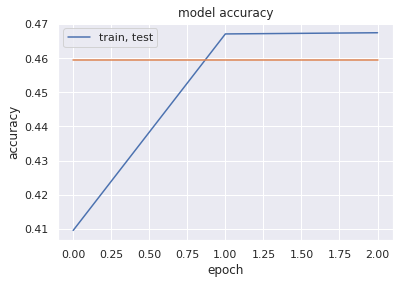

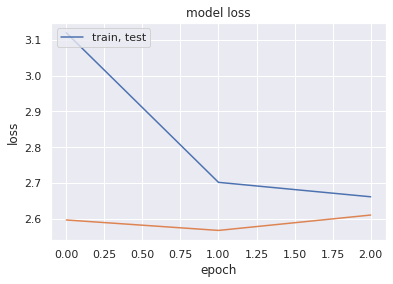

<Figure size 432x288 with 0 Axes>

In [167]:
#128 nodes in LSTM layer with glove embedding size 100 and adam optimizer
print('***********************************************************************')
print('128 nodes in LSTM layer with glove embedding size 100 and adam optimizer')
unilstm_100_1 = CreateUniLSTM(emb_100, 100, 74, 128, False)
RunClassifier(unilstm_100_1, X_train_nn, X_test_nn, y_train_nn, y_test_nn, 'Adam')

***********************************************************************
128 nodes in LSTM layer with trained embeddings size 100 and adam optimizer
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 200, 100)          1314300   
_________________________________________________________________
lstm_11 (LSTM)               (None, 200, 128)          117248    
_________________________________________________________________
lstm_12 (LSTM)               (None, 200, 128)          131584    
_________________________________________________________________
global_max_pooling1d_7 (Glob (None, 128)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_29 (Dropout)         (None, 1

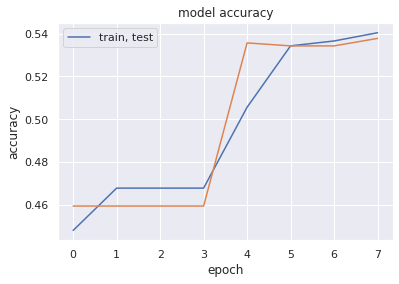

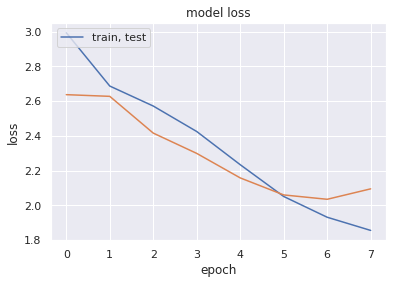

<Figure size 432x288 with 0 Axes>

In [168]:
#128 nodes in LSTM layer with trained embeddings size 100 and adam optimizer
print('***********************************************************************')
print('128 nodes in LSTM layer with trained embeddings size 100 and adam optimizer')
unilstm_100_2 = CreateUniLSTM(emb_100, 100, 74, 128, True)
RunClassifier(unilstm_100_2, X_train_nn, X_test_nn, y_train_nn, y_test_nn, 'Adam')

***********************************************************************
128 nodes in LSTM layer with glove embedding size 100 and RMS Prop optimizer
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 200, 100)          1314300   
_________________________________________________________________
lstm_13 (LSTM)               (None, 200, 128)          117248    
_________________________________________________________________
lstm_14 (LSTM)               (None, 200, 128)          131584    
_________________________________________________________________
global_max_pooling1d_8 (Glob (None, 128)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_32 (Dropout)         (None, 

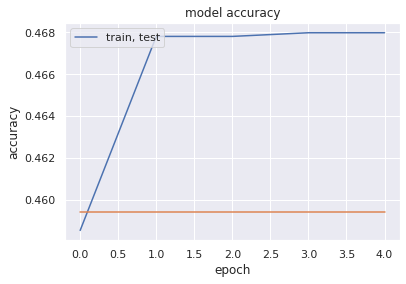

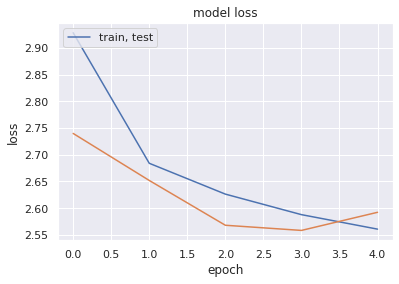

<Figure size 432x288 with 0 Axes>

In [169]:
#128 nodes in LSTM layer with glove embedding size 100 and RMS Prop optimizer
print('***********************************************************************')
print('128 nodes in LSTM layer with glove embedding size 100 and RMS Prop optimizer')
unilstm_100_3 = CreateUniLSTM(emb_100, 100, 74, 128, False)
RunClassifier(unilstm_100_3, X_train_nn, X_test_nn, y_train_nn, y_test_nn, 'RMS Prop')

***********************************************************************
128 nodes in LSTM layer with trained embedding size 100 and RMS Prop optimizer
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 200, 100)          1314300   
_________________________________________________________________
lstm_15 (LSTM)               (None, 200, 128)          117248    
_________________________________________________________________
lstm_16 (LSTM)               (None, 200, 128)          131584    
_________________________________________________________________
global_max_pooling1d_9 (Glob (None, 128)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_35 (Dropout)         (None

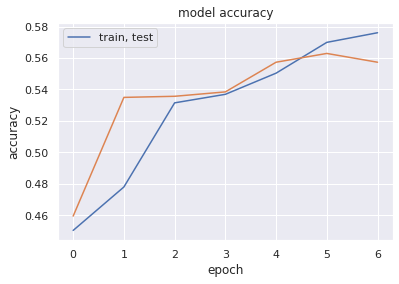

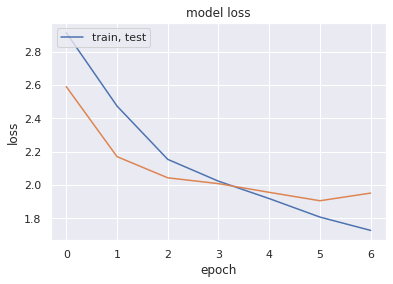

<Figure size 432x288 with 0 Axes>

In [170]:
#128 nodes in LSTM layer with trained embedding size 100 and RMS Prop optimizer
print('***********************************************************************')
print('128 nodes in LSTM layer with trained embedding size 100 and RMS Prop optimizer')
unilstm_100_4 = CreateUniLSTM(emb_100, 100, 74, 128, True)
RunClassifier(unilstm_100_4, X_train_nn, X_test_nn, y_train_nn, y_test_nn, 'RMS Prop')

***********************************************************************
256 nodes in LSTM layer with glove embedding size 100 and adam optimizer
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 200, 100)          1314300   
_________________________________________________________________
lstm_17 (LSTM)               (None, 200, 256)          365568    
_________________________________________________________________
lstm_18 (LSTM)               (None, 200, 256)          525312    
_________________________________________________________________
global_max_pooling1d_10 (Glo (None, 256)               0         
_________________________________________________________________
dense_54 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_38 (Dropout)         (None, 128)

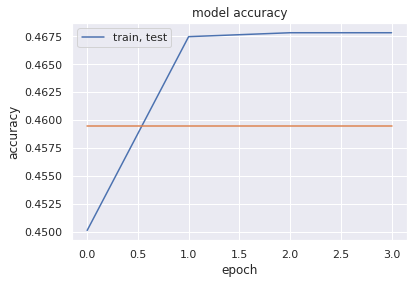

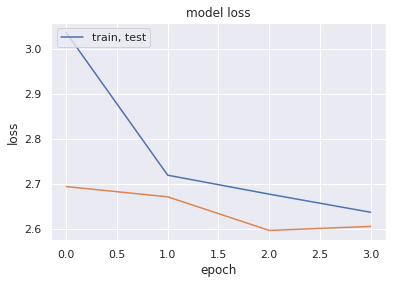

<Figure size 432x288 with 0 Axes>

In [171]:
#256 nodes in LSTM layer with glove embedding size 100 and adam optimizer
print('***********************************************************************')
print('256 nodes in LSTM layer with glove embedding size 100 and adam optimizer')
unilstm_100_5 = CreateUniLSTM(emb_100, 100, 74, 256, False)
RunClassifier(unilstm_100_5, X_train_nn, X_test_nn, y_train_nn, y_test_nn, 'Adam')


***********************************************************************
256 nodes in LSTM layer with glove embedding and RMS Prop optimizer
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 200, 100)          1314300   
_________________________________________________________________
lstm_19 (LSTM)               (None, 200, 256)          365568    
_________________________________________________________________
lstm_20 (LSTM)               (None, 200, 256)          525312    
_________________________________________________________________
global_max_pooling1d_11 (Glo (None, 256)               0         
_________________________________________________________________
dense_58 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_41 (Dropout)         (None, 128)     

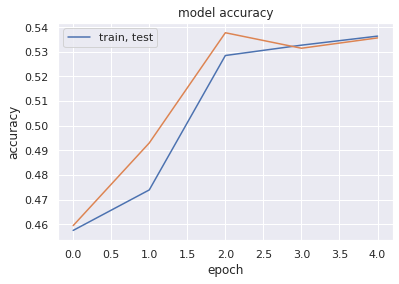

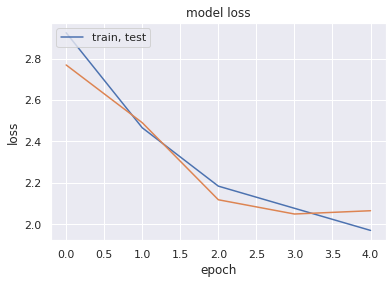

<Figure size 432x288 with 0 Axes>

In [172]:
#256 nodes in LSTM layer with glove embedding and RMS Prop optimizer
print('***********************************************************************')
print('256 nodes in LSTM layer with glove embedding and RMS Prop optimizer')
unilstm_100_6 = CreateUniLSTM(emb_100, 100, 74, 256, True)
RunClassifier(unilstm_100_6, X_train_nn, X_test_nn, y_train_nn, y_test_nn, 'RMS Prop')

In [173]:
metrics1 = {'Nodes':[128,128,128,128,256,256],
            'Embedding':['Glove Embedding','Trained Embedding','Glove Embedding','Trained Embedding','Glove Embedding','Trained Embedding'],
            'Optimizer':['Adam','Adam','RMS Prop','RMS Prop','Adam','RMS Prop'],
            'Training Accuracy':[unilstm_100_1.evaluate(X_train_nn, y_train_nn)[1]*100,unilstm_100_2.evaluate(X_train_nn, y_train_nn)[1]*100, 
                                 unilstm_100_3.evaluate(X_train_nn, y_train_nn)[1]*100,unilstm_100_4.evaluate(X_train_nn, y_train_nn)[1]*100,
                                 unilstm_100_5.evaluate(X_train_nn, y_train_nn)[1]*100,unilstm_100_6.evaluate(X_train_nn, y_train_nn)[1]*100],
            'Test Accuracy':[unilstm_100_1.evaluate(X_test_nn, y_test_nn, verbose=0)[1]*100, unilstm_100_2.evaluate(X_test_nn, y_test_nn, verbose=0)[1]*100,
                             unilstm_100_3.evaluate(X_test_nn, y_test_nn, verbose=0)[1]*100, unilstm_100_4.evaluate(X_test_nn, y_test_nn, verbose=0)[1]*100,
                             unilstm_100_5.evaluate(X_test_nn, y_test_nn, verbose=0)[1]*100, unilstm_100_6.evaluate(X_test_nn, y_test_nn, verbose=0)[1]*100]}

df1 = pd.DataFrame(metrics1, columns=['Nodes','Embedding','Optimizer','Training Accuracy','Test Accuracy'])
print('Unidirectional LSTM with embedding size 100')
print(df1)

224/224 [==============================] - 3s 12ms/step - loss: 1.9203 - accuracy: 0.5395
Unidirectional LSTM with embedding size 100
   Nodes          Embedding Optimizer  Training Accuracy  Test Accuracy
0    128    Glove Embedding      Adam          46.613491      47.147384
1    128  Trained Embedding      Adam          54.254127      53.882724
2    128    Glove Embedding  RMS Prop          46.613491      47.147384
3    128  Trained Embedding  RMS Prop          57.752591      57.210779
4    256    Glove Embedding      Adam          46.613491      47.147384
5    256  Trained Embedding  RMS Prop          53.946263      54.437399


Unidirectional LSTM with Embedding size 200

***********************************************************************
128 nodes in LSTM layer with glove embedding size 200 and adam optimizer
Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_16 (Embedding)     (None, 200, 200)          2628600   
_________________________________________________________________
lstm_21 (LSTM)               (None, 200, 128)          168448    
_________________________________________________________________
lstm_22 (LSTM)               (None, 200, 128)          131584    
_________________________________________________________________
global_max_pooling1d_12 (Glo (None, 128)               0         
_________________________________________________________________
dense_62 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_44 (Dropout)         (None, 128)

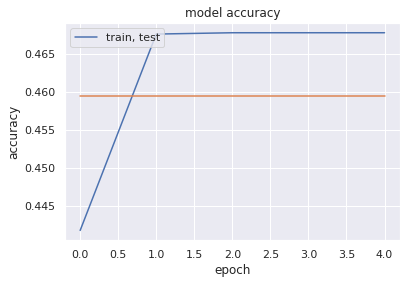

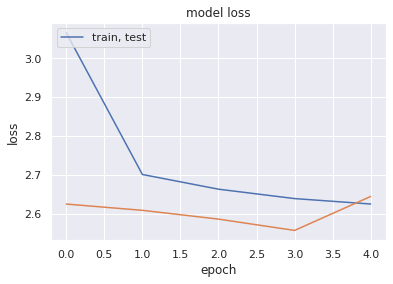

<Figure size 432x288 with 0 Axes>

In [174]:
#128 nodes in LSTM layer with glove embedding size 200 and adam optimizer
print('***********************************************************************')
print('128 nodes in LSTM layer with glove embedding size 200 and adam optimizer')
unilstm_200_1 = CreateUniLSTM(emb_200, 200, 74, 128, False)
RunClassifier(unilstm_200_1, X_train_nn, X_test_nn, y_train_nn, y_test_nn, 'Adam')

***********************************************************************
128 nodes in LSTM layer with trained embeddings size 200 and adam optimizer
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_17 (Embedding)     (None, 200, 200)          2628600   
_________________________________________________________________
lstm_23 (LSTM)               (None, 200, 128)          168448    
_________________________________________________________________
lstm_24 (LSTM)               (None, 200, 128)          131584    
_________________________________________________________________
global_max_pooling1d_13 (Glo (None, 128)               0         
_________________________________________________________________
dense_66 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_47 (Dropout)         (None, 1

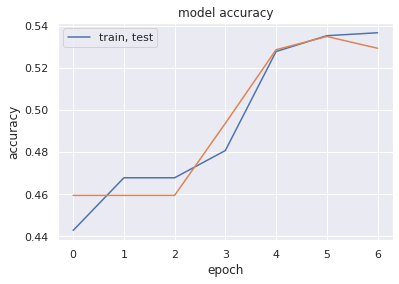

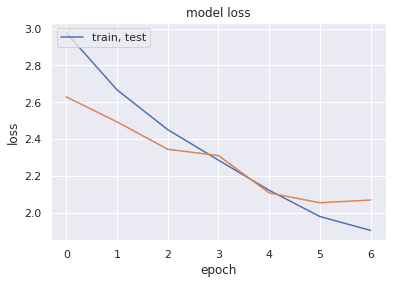

<Figure size 432x288 with 0 Axes>

In [175]:
#128 nodes in LSTM layer with trained embeddings size 200 and adam optimizer
print('***********************************************************************')
print('128 nodes in LSTM layer with trained embeddings size 200 and adam optimizer')
unilstm_200_2 = CreateUniLSTM(emb_200, 200, 74, 128, True)
RunClassifier(unilstm_200_2, X_train_nn, X_test_nn, y_train_nn, y_test_nn, 'Adam')


***********************************************************************
128 nodes in LSTM layer with glove embedding size 200 and RMS Prop optimizer
Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_18 (Embedding)     (None, 200, 200)          2628600   
_________________________________________________________________
lstm_25 (LSTM)               (None, 200, 128)          168448    
_________________________________________________________________
lstm_26 (LSTM)               (None, 200, 128)          131584    
_________________________________________________________________
global_max_pooling1d_14 (Glo (None, 128)               0         
_________________________________________________________________
dense_70 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_50 (Dropout)         (None, 

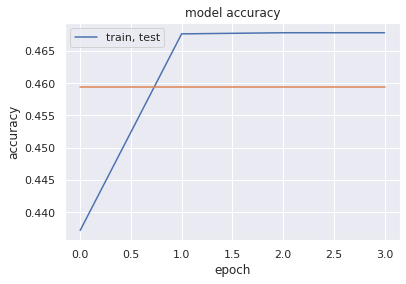

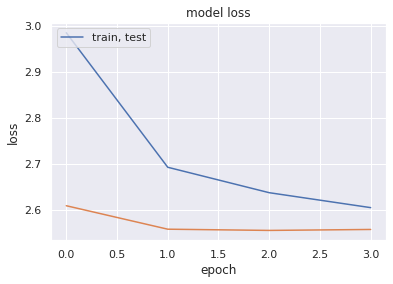

<Figure size 432x288 with 0 Axes>

In [176]:
#128 nodes in LSTM layer with glove embedding size 200 and RMS Prop optimizer
print('***********************************************************************')
print('128 nodes in LSTM layer with glove embedding size 200 and RMS Prop optimizer')
unilstm_200_3 = CreateUniLSTM(emb_200, 200, 74, 128, False)
RunClassifier(unilstm_200_3, X_train_nn, X_test_nn, y_train_nn, y_test_nn, 'RMS Prop')

***********************************************************************
128 nodes in LSTM layer with trained embedding size 200 and RMS Prop optimizer
Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_19 (Embedding)     (None, 200, 200)          2628600   
_________________________________________________________________
lstm_27 (LSTM)               (None, 200, 128)          168448    
_________________________________________________________________
lstm_28 (LSTM)               (None, 200, 128)          131584    
_________________________________________________________________
global_max_pooling1d_15 (Glo (None, 128)               0         
_________________________________________________________________
dense_74 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_53 (Dropout)         (None

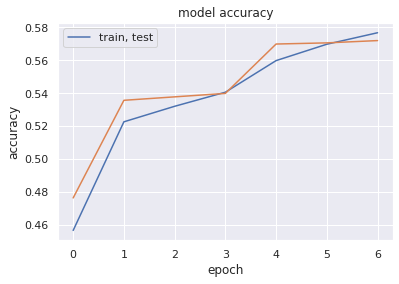

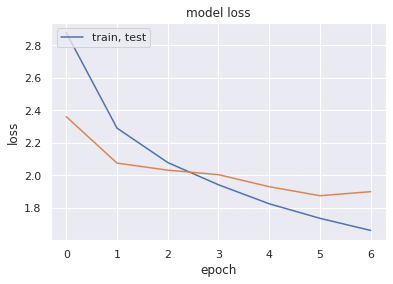

<Figure size 432x288 with 0 Axes>

In [177]:
#128 nodes in LSTM layer with trained embedding size 200 and RMS Prop optimizer
print('***********************************************************************')
print('128 nodes in LSTM layer with trained embedding size 200 and RMS Prop optimizer')
unilstm_200_4 = CreateUniLSTM(emb_200, 200, 74, 128, True)
RunClassifier(unilstm_200_4, X_train_nn, X_test_nn, y_train_nn, y_test_nn, 'RMS Prop')

***********************************************************************
256 nodes in LSTM layer with glove embedding size 200 and adam optimizer
Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_20 (Embedding)     (None, 200, 200)          2628600   
_________________________________________________________________
lstm_29 (LSTM)               (None, 200, 256)          467968    
_________________________________________________________________
lstm_30 (LSTM)               (None, 200, 256)          525312    
_________________________________________________________________
global_max_pooling1d_16 (Glo (None, 256)               0         
_________________________________________________________________
dense_78 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_56 (Dropout)         (None, 128)

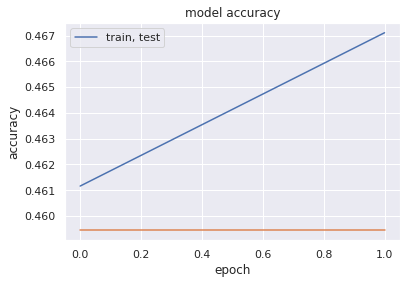

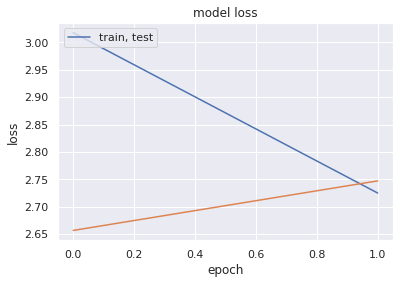

<Figure size 432x288 with 0 Axes>

In [178]:

#256 nodes in LSTM layer with glove embedding size 200 and adam optimizer
print('***********************************************************************')
print('256 nodes in LSTM layer with glove embedding size 200 and adam optimizer')
unilstm_200_5 = CreateUniLSTM(emb_200, 200, 74, 256, False)
RunClassifier(unilstm_200_5, X_train_nn, X_test_nn, y_train_nn, y_test_nn, 'Adam')

***********************************************************************
256 nodes in LSTM layer with glove embedding size 200 and RMS Prop optimizer
Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_21 (Embedding)     (None, 200, 200)          2628600   
_________________________________________________________________
lstm_31 (LSTM)               (None, 200, 256)          467968    
_________________________________________________________________
lstm_32 (LSTM)               (None, 200, 256)          525312    
_________________________________________________________________
global_max_pooling1d_17 (Glo (None, 256)               0         
_________________________________________________________________
dense_82 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_59 (Dropout)         (None, 

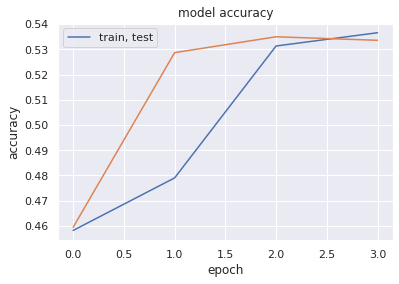

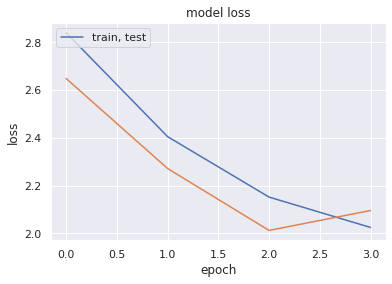

<Figure size 432x288 with 0 Axes>

In [179]:
#256 nodes in LSTM layer with glove embedding size 200 and RMS Prop optimizer
print('***********************************************************************')
print('256 nodes in LSTM layer with glove embedding size 200 and RMS Prop optimizer')
unilstm_200_6 = CreateUniLSTM(emb_200, 200, 74, 256, True)
RunClassifier(unilstm_200_6, X_train_nn, X_test_nn, y_train_nn, y_test_nn, 'RMS Prop')

In [180]:
metrics2 = {'Nodes':[128,128,128,128,256,256],
            'Embedding':['Glove Embedding','Trained Embedding','Glove Embedding','Trained Embedding','Glove Embedding','Trained Embedding'],
            'Optimizer':['Adam','Adam','RMS Prop','RMS Prop','Adam','RMS Prop'],
            'Training Accuracy':[unilstm_200_1.evaluate(X_train_nn, y_train_nn)[1]*100,unilstm_200_2.evaluate(X_train_nn, y_train_nn)[1]*100, 
                                 unilstm_200_3.evaluate(X_train_nn, y_train_nn)[1]*100,unilstm_200_4.evaluate(X_train_nn, y_train_nn)[1]*100,
                                 unilstm_200_5.evaluate(X_train_nn, y_train_nn)[1]*100,unilstm_200_6.evaluate(X_train_nn, y_train_nn)[1]*100],
            'Test Accuracy':[unilstm_200_1.evaluate(X_test_nn, y_test_nn, verbose=0)[1]*100, unilstm_200_2.evaluate(X_test_nn, y_test_nn, verbose=0)[1]*100,
                             unilstm_200_3.evaluate(X_test_nn, y_test_nn, verbose=0)[1]*100, unilstm_200_4.evaluate(X_test_nn, y_test_nn, verbose=0)[1]*100,
                             unilstm_200_5.evaluate(X_test_nn, y_test_nn, verbose=0)[1]*100, unilstm_200_6.evaluate(X_test_nn, y_test_nn, verbose=0)[1]*100]}

df2 = pd.DataFrame(metrics2, columns=['Nodes','Embedding','Optimizer','Training Accuracy','Test Accuracy'])
print('Unidirectional LSTM with embedding size 200')
print(df2)

224/224 [==============================] - 3s 13ms/step - loss: 1.9798 - accuracy: 0.5386
Unidirectional LSTM with embedding size 200
   Nodes          Embedding Optimizer  Training Accuracy  Test Accuracy
0    128    Glove Embedding      Adam          46.613491      47.147384
1    128  Trained Embedding      Adam          53.904283      53.645009
2    128    Glove Embedding  RMS Prop          46.613491      47.147384
3    128  Trained Embedding  RMS Prop          58.942068      58.795565
4    256    Glove Embedding      Adam          46.613491      47.147384
5    256  Trained Embedding  RMS Prop          53.862303      54.437399


Unidirectional LSTM with embedding size 300

***********************************************************************
128 nodes in LSTM layer with glove embedding size 300 and adam optimizer
Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_22 (Embedding)     (None, 200, 300)          3942900   
_________________________________________________________________
lstm_33 (LSTM)               (None, 200, 128)          219648    
_________________________________________________________________
lstm_34 (LSTM)               (None, 200, 128)          131584    
_________________________________________________________________
global_max_pooling1d_18 (Glo (None, 128)               0         
_________________________________________________________________
dense_86 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_62 (Dropout)         (None, 128)

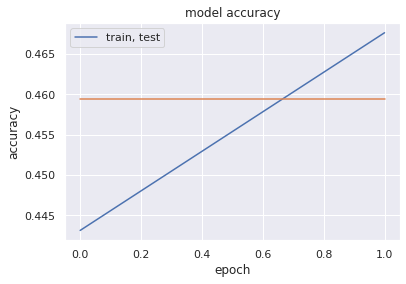

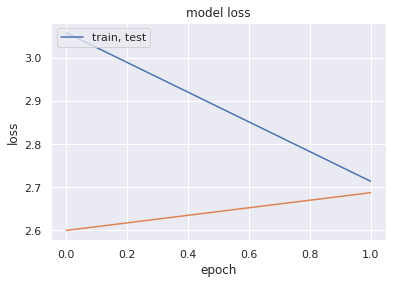

<Figure size 432x288 with 0 Axes>

In [181]:
#128 nodes in LSTM layer with glove embedding size 300 and adam optimizer
print('***********************************************************************')
print('128 nodes in LSTM layer with glove embedding size 300 and adam optimizer')
unilstm_300_1 = CreateUniLSTM(emb_300, 300, 74, 128, False)
RunClassifier(unilstm_300_1, X_train_nn, X_test_nn, y_train_nn, y_test_nn, 'Adam')

***********************************************************************
128 nodes in LSTM layer with trained embeddings size 300 and adam optimizer
Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_23 (Embedding)     (None, 200, 300)          3942900   
_________________________________________________________________
lstm_35 (LSTM)               (None, 200, 128)          219648    
_________________________________________________________________
lstm_36 (LSTM)               (None, 200, 128)          131584    
_________________________________________________________________
global_max_pooling1d_19 (Glo (None, 128)               0         
_________________________________________________________________
dense_90 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_65 (Dropout)         (None, 1

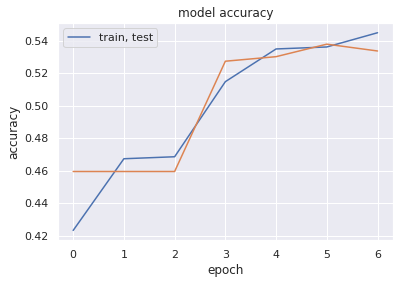

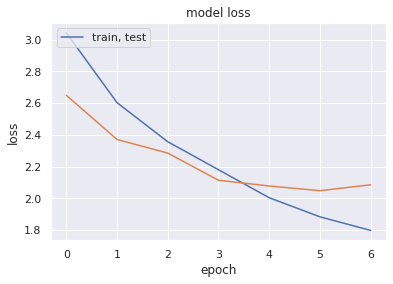

<Figure size 432x288 with 0 Axes>

In [182]:
#128 nodes in LSTM layer with trained embeddings size 300 and adam optimizer
print('***********************************************************************')
print('128 nodes in LSTM layer with trained embeddings size 300 and adam optimizer')
unilstm_300_2 = CreateUniLSTM(emb_300, 300, 74, 128, True)
RunClassifier(unilstm_300_2, X_train_nn, X_test_nn, y_train_nn, y_test_nn, 'Adam')

***********************************************************************
128 nodes in LSTM layer with glove embedding size 300 and RMS Prop optimizer
Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_24 (Embedding)     (None, 200, 300)          3942900   
_________________________________________________________________
lstm_37 (LSTM)               (None, 200, 128)          219648    
_________________________________________________________________
lstm_38 (LSTM)               (None, 200, 128)          131584    
_________________________________________________________________
global_max_pooling1d_20 (Glo (None, 128)               0         
_________________________________________________________________
dense_94 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_68 (Dropout)         (None, 

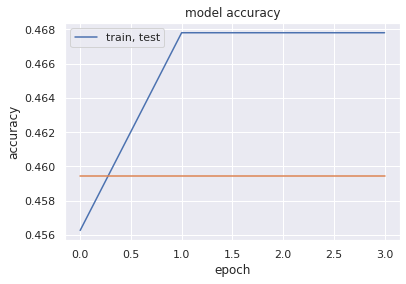

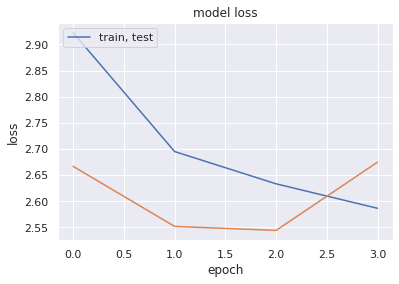

<Figure size 432x288 with 0 Axes>

In [183]:
#128 nodes in LSTM layer with glove embedding size 300 and RMS Prop optimizer
print('***********************************************************************')
print('128 nodes in LSTM layer with glove embedding size 300 and RMS Prop optimizer')
unilstm_300_3 = CreateUniLSTM(emb_300, 300, 74, 128, False)
RunClassifier(unilstm_300_3, X_train_nn, X_test_nn, y_train_nn, y_test_nn, 'RMS Prop')

***********************************************************************
128 nodes in LSTM layer with trained embedding sixe 300 and RMS Prop optimizer
Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_25 (Embedding)     (None, 200, 300)          3942900   
_________________________________________________________________
lstm_39 (LSTM)               (None, 200, 128)          219648    
_________________________________________________________________
lstm_40 (LSTM)               (None, 200, 128)          131584    
_________________________________________________________________
global_max_pooling1d_21 (Glo (None, 128)               0         
_________________________________________________________________
dense_98 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_71 (Dropout)         (None

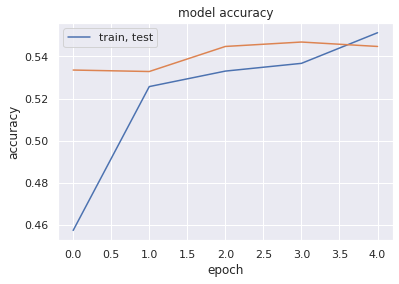

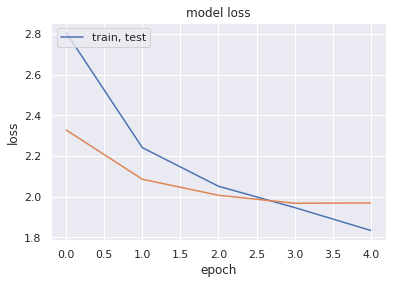

<Figure size 432x288 with 0 Axes>

In [184]:
#128 nodes in LSTM layer with trained embedding sixe 300 and RMS Prop optimizer
print('***********************************************************************')
print('128 nodes in LSTM layer with trained embedding sixe 300 and RMS Prop optimizer')
unilstm_300_4 = CreateUniLSTM(emb_300, 300, 74, 128, True)
RunClassifier(unilstm_300_4, X_train_nn, X_test_nn, y_train_nn, y_test_nn, 'RMS Prop')

***********************************************************************
256 nodes in LSTM layer with glove embedding size 300 and adam optimizer
Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_26 (Embedding)     (None, 200, 300)          3942900   
_________________________________________________________________
lstm_41 (LSTM)               (None, 200, 256)          570368    
_________________________________________________________________
lstm_42 (LSTM)               (None, 200, 256)          525312    
_________________________________________________________________
global_max_pooling1d_22 (Glo (None, 256)               0         
_________________________________________________________________
dense_102 (Dense)            (None, 128)               32896     
_________________________________________________________________
dropout_74 (Dropout)         (None, 128)

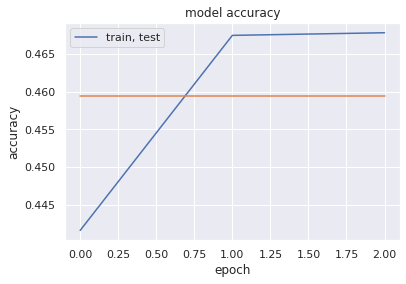

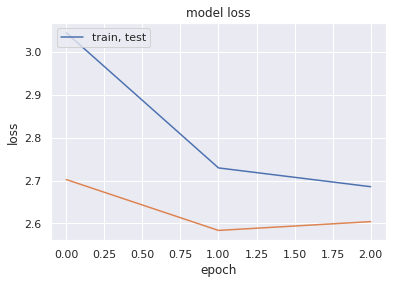

<Figure size 432x288 with 0 Axes>

In [185]:
#256 nodes in LSTM layer with glove embedding size 300 and adam optimizer
print('***********************************************************************')
print('256 nodes in LSTM layer with glove embedding size 300 and adam optimizer')
unilstm_300_5 = CreateUniLSTM(emb_300, 300, 74, 256, False)
RunClassifier(unilstm_300_5, X_train_nn, X_test_nn, y_train_nn, y_test_nn, 'Adam')

***********************************************************************
256 nodes in LSTM layer with glove embedding size 300 and RMS Prop optimizer
Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_27 (Embedding)     (None, 200, 300)          3942900   
_________________________________________________________________
lstm_43 (LSTM)               (None, 200, 256)          570368    
_________________________________________________________________
lstm_44 (LSTM)               (None, 200, 256)          525312    
_________________________________________________________________
global_max_pooling1d_23 (Glo (None, 256)               0         
_________________________________________________________________
dense_106 (Dense)            (None, 128)               32896     
_________________________________________________________________
dropout_77 (Dropout)         (None, 

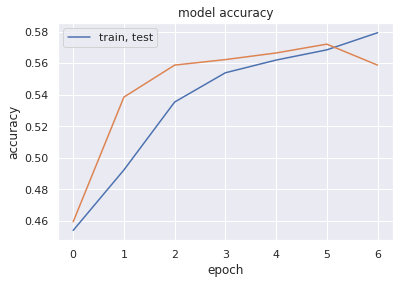

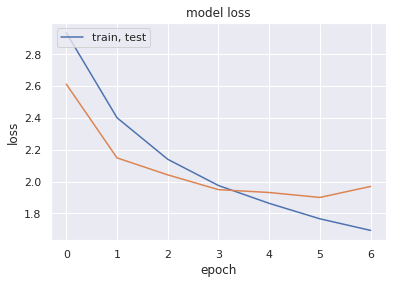

<Figure size 432x288 with 0 Axes>

In [186]:
#256 nodes in LSTM layer with glove embedding size 300 and RMS Prop optimizer
print('***********************************************************************')
print('256 nodes in LSTM layer with glove embedding size 300 and RMS Prop optimizer')
unilstm_300_6 = CreateUniLSTM(emb_300, 300, 74, 256, True)
RunClassifier(unilstm_300_6, X_train_nn, X_test_nn, y_train_nn, y_test_nn, 'RMS Prop')

In [187]:
metrics3 = {'Nodes':[128,128,128,128,256,256],
            'Embedding':['Glove Embedding','Trained Embedding','Glove Embedding','Trained Embedding','Glove Embedding','Trained Embedding'],
            'Optimizer':['Adam','Adam','RMS Prop','RMS Prop','Adam','RMS Prop'],
            'Training Accuracy':[unilstm_300_1.evaluate(X_train_nn, y_train_nn)[1]*100,unilstm_300_2.evaluate(X_train_nn, y_train_nn)[1]*100, 
                                 unilstm_300_3.evaluate(X_train_nn, y_train_nn)[1]*100,unilstm_300_4.evaluate(X_train_nn, y_train_nn)[1]*100,
                                 unilstm_300_5.evaluate(X_train_nn, y_train_nn)[1]*100,unilstm_300_6.evaluate(X_train_nn, y_train_nn)[1]*100],
            'Test Accuracy':[unilstm_300_1.evaluate(X_test_nn, y_test_nn, verbose=0)[1]*100, unilstm_300_2.evaluate(X_test_nn, y_test_nn, verbose=0)[1]*100,
                             unilstm_300_3.evaluate(X_test_nn, y_test_nn, verbose=0)[1]*100, unilstm_300_4.evaluate(X_test_nn, y_test_nn, verbose=0)[1]*100,
                             unilstm_300_5.evaluate(X_test_nn, y_test_nn, verbose=0)[1]*100, unilstm_300_6.evaluate(X_test_nn, y_test_nn, verbose=0)[1]*100]}

df3 = pd.DataFrame(metrics3, columns=['Nodes','Embedding','Optimizer','Training Accuracy','Test Accuracy'])
print('Unidirectional LSTM with embedding size 300')
print(df3)

224/224 [==============================] - 3s 14ms/step - loss: 1.6258 - accuracy: 0.5800
Unidirectional LSTM with embedding size 300
   Nodes          Embedding Optimizer  Training Accuracy  Test Accuracy
0    128    Glove Embedding      Adam          46.613491      47.147384
1    128  Trained Embedding      Adam          54.268122      53.803486
2    128    Glove Embedding  RMS Prop          46.613491      47.147384
3    128  Trained Embedding  RMS Prop          57.696611      56.418383
4    256    Glove Embedding      Adam          46.613491      47.147384
5    256  Trained Embedding  RMS Prop          58.004481      57.290018


Bidirectional LSTM with embedding size 100

***********************************************************************
128 nodes in LSTM layer with glove embedding size 100 and adam optimizer
Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_28 (Embedding)     (None, 200, 100)          1314300   
_________________________________________________________________
bidirectional_6 (Bidirection (None, 200, 256)          234496    
_________________________________________________________________
bidirectional_7 (Bidirection (None, 200, 256)          394240    
_________________________________________________________________
global_max_pooling1d_24 (Glo (None, 256)               0         
_________________________________________________________________
dense_110 (Dense)            (None, 128)               32896     
_________________________________________________________________
p_re_lu (PReLU)              (None, 128)

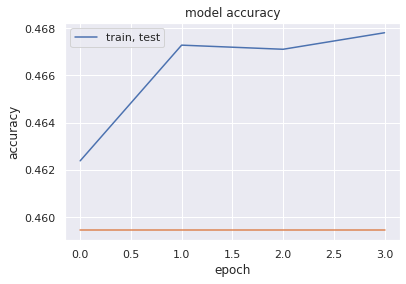

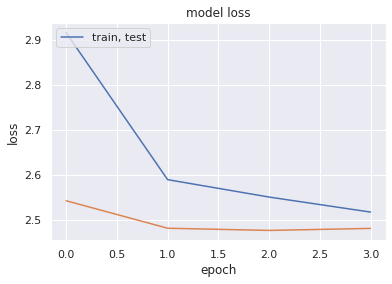

<Figure size 432x288 with 0 Axes>

In [188]:
#128 nodes in LSTM layer with glove embedding size 100 and adam optimizer
print('***********************************************************************')
print('128 nodes in LSTM layer with glove embedding size 100 and adam optimizer')
bilstm_100_1 = CreateBiLSTM(emb_100, 100, 74, 128, False)
RunClassifier(bilstm_100_1, X_train_nn, X_test_nn, y_train_nn, y_test_nn, 'Adam')

***********************************************************************
128 nodes in LSTM layer with trained embeddings size 100 and adam optimizer
Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_29 (Embedding)     (None, 200, 100)          1314300   
_________________________________________________________________
bidirectional_8 (Bidirection (None, 200, 256)          234496    
_________________________________________________________________
bidirectional_9 (Bidirection (None, 200, 256)          394240    
_________________________________________________________________
global_max_pooling1d_25 (Glo (None, 256)               0         
_________________________________________________________________
dense_113 (Dense)            (None, 128)               32896     
_________________________________________________________________
p_re_lu_2 (PReLU)            (None, 1

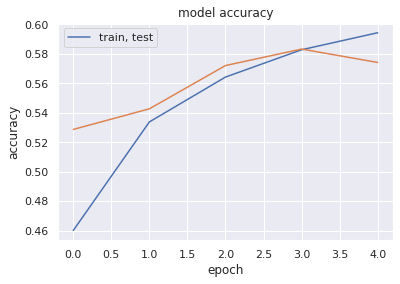

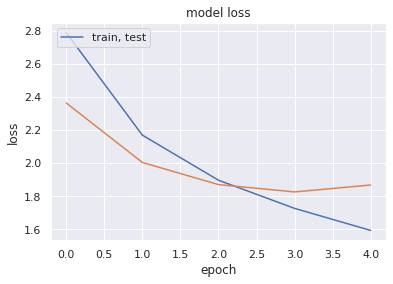

<Figure size 432x288 with 0 Axes>

In [189]:
#128 nodes in LSTM layer with trained embeddings size 100 and adam optimizer
print('***********************************************************************')
print('128 nodes in LSTM layer with trained embeddings size 100 and adam optimizer')
bilstm_100_2 = CreateBiLSTM(emb_100, 100, 74, 128, True)
RunClassifier(bilstm_100_2, X_train_nn, X_test_nn, y_train_nn, y_test_nn, 'Adam')

***********************************************************************
128 nodes in LSTM layer with glove embedding size 100 and RMS Prop optimizer
Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_30 (Embedding)     (None, 200, 100)          1314300   
_________________________________________________________________
bidirectional_10 (Bidirectio (None, 200, 256)          234496    
_________________________________________________________________
bidirectional_11 (Bidirectio (None, 200, 256)          394240    
_________________________________________________________________
global_max_pooling1d_26 (Glo (None, 256)               0         
_________________________________________________________________
dense_116 (Dense)            (None, 128)               32896     
_________________________________________________________________
p_re_lu_4 (PReLU)            (None, 

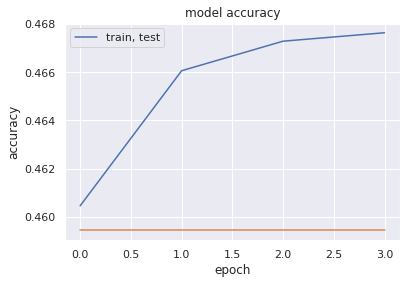

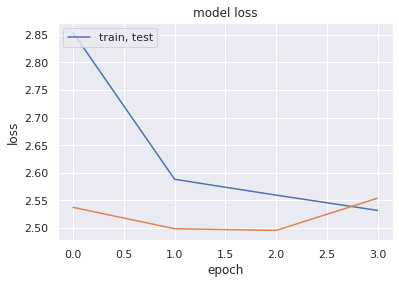

<Figure size 432x288 with 0 Axes>

In [190]:
#128 nodes in LSTM layer with glove embedding size 100 and RMS Prop optimizer
print('***********************************************************************')
print('128 nodes in LSTM layer with glove embedding size 100 and RMS Prop optimizer')
bilstm_100_3 = CreateBiLSTM(emb_100, 100, 74, 128, False)
RunClassifier(bilstm_100_3, X_train_nn, X_test_nn, y_train_nn, y_test_nn, 'RMS Prop')

***********************************************************************
128 nodes in LSTM layer with trained embedding sixe 100 and RMS Prop optimizer
Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_31 (Embedding)     (None, 200, 100)          1314300   
_________________________________________________________________
bidirectional_12 (Bidirectio (None, 200, 256)          234496    
_________________________________________________________________
bidirectional_13 (Bidirectio (None, 200, 256)          394240    
_________________________________________________________________
global_max_pooling1d_27 (Glo (None, 256)               0         
_________________________________________________________________
dense_119 (Dense)            (None, 128)               32896     
_________________________________________________________________
p_re_lu_6 (PReLU)            (None

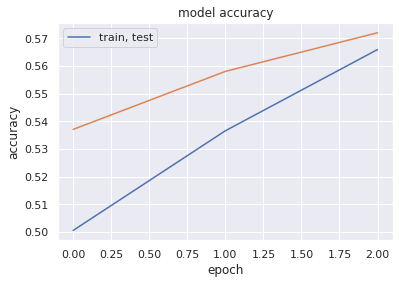

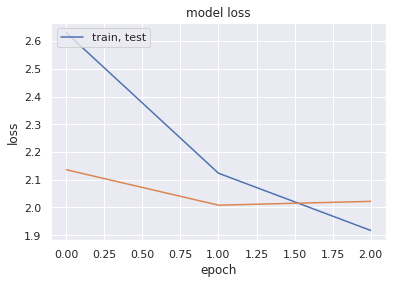

<Figure size 432x288 with 0 Axes>

In [191]:
#128 nodes in LSTM layer with trained embedding sixe 100 and RMS Prop optimizer
print('***********************************************************************')
print('128 nodes in LSTM layer with trained embedding sixe 100 and RMS Prop optimizer')
bilstm_100_4 = CreateBiLSTM(emb_100, 100, 74, 128, True)
RunClassifier(bilstm_100_4, X_train_nn, X_test_nn, y_train_nn, y_test_nn, 'RMS Prop')

***********************************************************************
256 nodes in LSTM layer with glove embedding size 100 and adam optimizer
Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_32 (Embedding)     (None, 200, 100)          1314300   
_________________________________________________________________
bidirectional_14 (Bidirectio (None, 200, 512)          731136    
_________________________________________________________________
bidirectional_15 (Bidirectio (None, 200, 512)          1574912   
_________________________________________________________________
global_max_pooling1d_28 (Glo (None, 512)               0         
_________________________________________________________________
dense_122 (Dense)            (None, 128)               65664     
_________________________________________________________________
p_re_lu_8 (PReLU)            (None, 128)

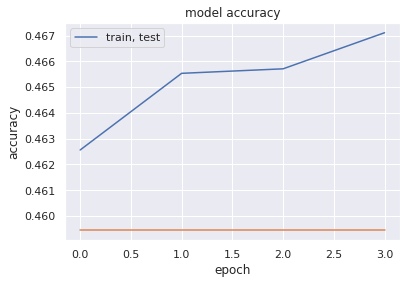

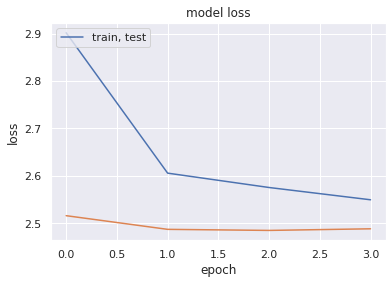

<Figure size 432x288 with 0 Axes>

In [192]:
#256 nodes in LSTM layer with glove embedding size 100 and adam optimizer
print('***********************************************************************')
print('256 nodes in LSTM layer with glove embedding size 100 and adam optimizer')
bilstm_100_5 = CreateBiLSTM(emb_100, 100, 74, 256, False)
RunClassifier(bilstm_100_5, X_train_nn, X_test_nn, y_train_nn, y_test_nn, 'Adam')

***********************************************************************
256 nodes in LSTM layer with glove embedding and RMS Prop optimizer
Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_33 (Embedding)     (None, 200, 100)          1314300   
_________________________________________________________________
bidirectional_16 (Bidirectio (None, 200, 512)          731136    
_________________________________________________________________
bidirectional_17 (Bidirectio (None, 200, 512)          1574912   
_________________________________________________________________
global_max_pooling1d_29 (Glo (None, 512)               0         
_________________________________________________________________
dense_125 (Dense)            (None, 128)               65664     
_________________________________________________________________
p_re_lu_10 (PReLU)           (None, 128)     

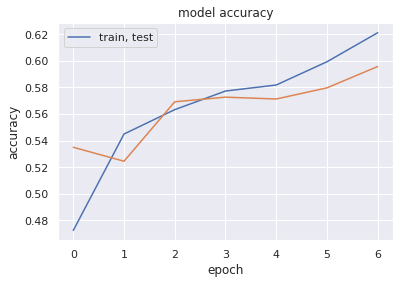

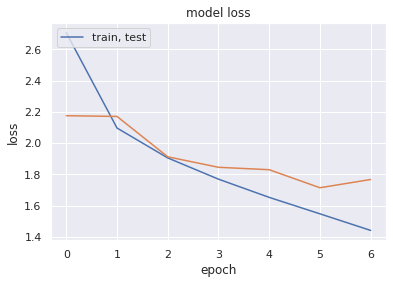

<Figure size 432x288 with 0 Axes>

In [193]:
#256 nodes in LSTM layer with glove embedding and RMS Prop optimizer
print('***********************************************************************')
print('256 nodes in LSTM layer with glove embedding and RMS Prop optimizer')
bilstm_100_6 = CreateBiLSTM(emb_100, 100, 74, 256, True)
RunClassifier(bilstm_100_6, X_train_nn, X_test_nn, y_train_nn, y_test_nn, 'RMS Prop')

In [194]:
metrics4= {'Nodes':[128,128,128,128,256,256],
            'Embedding':['Glove Embedding','Trained Embedding','Glove Embedding','Trained Embedding','Glove Embedding','Trained Embedding'],
            'Optimizer':['Adam','Adam','RMS Prop','RMS Prop','Adam','RMS Prop'],
            'Training Accuracy':[bilstm_100_1.evaluate(X_train_nn, y_train_nn)[1]*100,bilstm_100_2.evaluate(X_train_nn, y_train_nn)[1]*100, 
                                 bilstm_100_3.evaluate(X_train_nn, y_train_nn)[1]*100,bilstm_100_4.evaluate(X_train_nn, y_train_nn)[1]*100,
                                 bilstm_100_5.evaluate(X_train_nn, y_train_nn)[1]*100,bilstm_100_6.evaluate(X_train_nn, y_train_nn)[1]*100],
            'Test Accuracy':[bilstm_100_1.evaluate(X_test_nn, y_test_nn, verbose=0)[1]*100, bilstm_100_2.evaluate(X_test_nn, y_test_nn, verbose=0)[1]*100,
                             bilstm_100_3.evaluate(X_test_nn, y_test_nn, verbose=0)[1]*100, bilstm_100_4.evaluate(X_test_nn, y_test_nn, verbose=0)[1]*100,
                             bilstm_100_5.evaluate(X_test_nn, y_test_nn, verbose=0)[1]*100, bilstm_100_6.evaluate(X_test_nn, y_test_nn, verbose=0)[1]*100]}

df4 = pd.DataFrame(metrics4, columns=['Nodes','Embedding','Optimizer','Training Accuracy','Test Accuracy'])
print('Bidirectional LSTM with embedding size 100')
print(df4)

224/224 [==============================] - 6s 26ms/step - loss: 1.4039 - accuracy: 0.6314
Bidirectional LSTM with embedding size 100
   Nodes          Embedding Optimizer  Training Accuracy  Test Accuracy
0    128    Glove Embedding      Adam          46.613491      47.147384
1    128  Trained Embedding      Adam          60.607332      58.320129
2    128    Glove Embedding  RMS Prop          46.613491      47.147384
3    128  Trained Embedding  RMS Prop          57.654631      58.557844
4    256    Glove Embedding      Adam          46.613491      47.147384
5    256  Trained Embedding  RMS Prop          63.140219      61.806655


Bidirectional LSTM with embedding size as 200

***********************************************************************
128 nodes in LSTM layer with glove embedding size 200 and adam optimizer
Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_34 (Embedding)     (None, 200, 200)          2628600   
_________________________________________________________________
bidirectional_18 (Bidirectio (None, 200, 256)          336896    
_________________________________________________________________
bidirectional_19 (Bidirectio (None, 200, 256)          394240    
_________________________________________________________________
global_max_pooling1d_30 (Glo (None, 256)               0         
_________________________________________________________________
dense_128 (Dense)            (None, 128)               32896     
_________________________________________________________________
p_re_lu_12 (PReLU)           (None, 128)

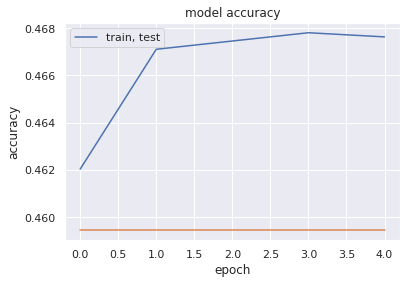

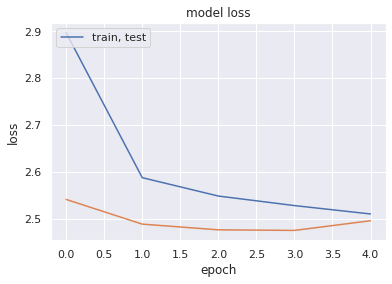

<Figure size 432x288 with 0 Axes>

In [195]:
#128 nodes in LSTM layer with glove embedding size 200 and adam optimizer
print('***********************************************************************')
print('128 nodes in LSTM layer with glove embedding size 200 and adam optimizer')
bilstm_200_1 = CreateBiLSTM(emb_200, 200, 74, 128, False)
RunClassifier(bilstm_200_1, X_train_nn, X_test_nn, y_train_nn, y_test_nn, 'Adam')

***********************************************************************
128 nodes in LSTM layer with trained embeddings size 200 and adam optimizer
Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_35 (Embedding)     (None, 200, 200)          2628600   
_________________________________________________________________
bidirectional_20 (Bidirectio (None, 200, 256)          336896    
_________________________________________________________________
bidirectional_21 (Bidirectio (None, 200, 256)          394240    
_________________________________________________________________
global_max_pooling1d_31 (Glo (None, 256)               0         
_________________________________________________________________
dense_131 (Dense)            (None, 128)               32896     
_________________________________________________________________
p_re_lu_14 (PReLU)           (None, 1

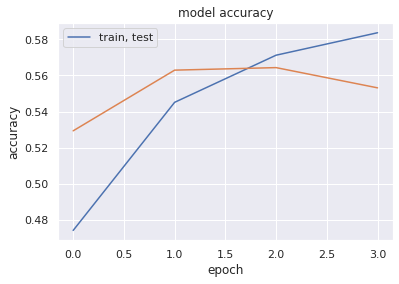

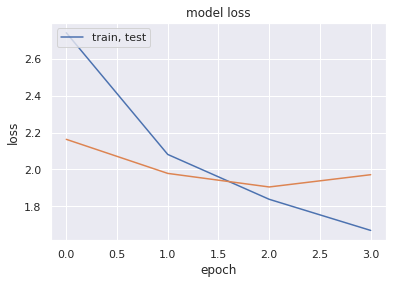

<Figure size 432x288 with 0 Axes>

In [196]:
#128 nodes in LSTM layer with trained embeddings size 200 and adam optimizer
print('***********************************************************************')
print('128 nodes in LSTM layer with trained embeddings size 200 and adam optimizer')
bilstm_200_2 = CreateBiLSTM(emb_200, 200, 74, 128, True)
RunClassifier(bilstm_200_2, X_train_nn, X_test_nn, y_train_nn, y_test_nn, 'Adam')

***********************************************************************
128 nodes in LSTM layer with glove embedding size 200 and RMS Prop optimizer
Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_36 (Embedding)     (None, 200, 200)          2628600   
_________________________________________________________________
bidirectional_22 (Bidirectio (None, 200, 256)          336896    
_________________________________________________________________
bidirectional_23 (Bidirectio (None, 200, 256)          394240    
_________________________________________________________________
global_max_pooling1d_32 (Glo (None, 256)               0         
_________________________________________________________________
dense_134 (Dense)            (None, 128)               32896     
_________________________________________________________________
p_re_lu_16 (PReLU)           (None, 

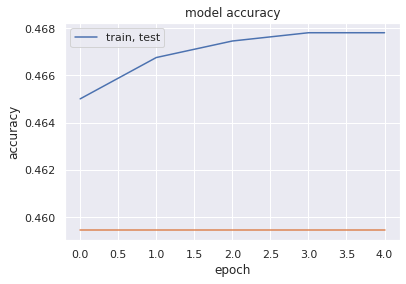

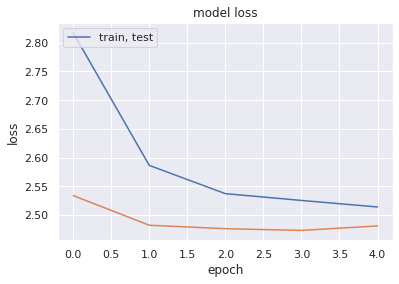

<Figure size 432x288 with 0 Axes>

In [197]:
#128 nodes in LSTM layer with glove embedding size 200 and RMS Prop optimizer
print('***********************************************************************')
print('128 nodes in LSTM layer with glove embedding size 200 and RMS Prop optimizer')
bilstm_200_3 = CreateBiLSTM(emb_200, 200, 74, 128, False)
RunClassifier(bilstm_200_3, X_train_nn, X_test_nn, y_train_nn, y_test_nn, 'RMS Prop')

***********************************************************************
128 nodes in LSTM layer with trained embedding sixe 200 and RMS Prop optimizer
Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_37 (Embedding)     (None, 200, 200)          2628600   
_________________________________________________________________
bidirectional_24 (Bidirectio (None, 200, 256)          336896    
_________________________________________________________________
bidirectional_25 (Bidirectio (None, 200, 256)          394240    
_________________________________________________________________
global_max_pooling1d_33 (Glo (None, 256)               0         
_________________________________________________________________
dense_137 (Dense)            (None, 128)               32896     
_________________________________________________________________
p_re_lu_18 (PReLU)           (None

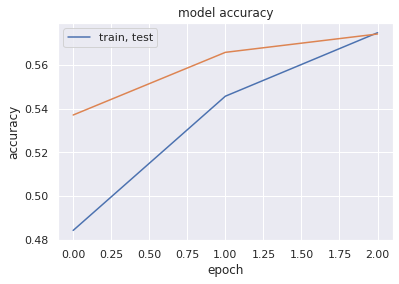

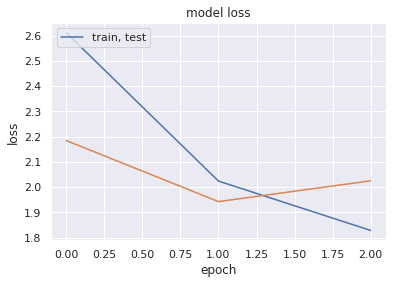

<Figure size 432x288 with 0 Axes>

In [198]:
#128 nodes in LSTM layer with trained embedding sixe 200 and RMS Prop optimizer
print('***********************************************************************')
print('128 nodes in LSTM layer with trained embedding sixe 200 and RMS Prop optimizer')
bilstm_200_4 = CreateBiLSTM(emb_200, 200, 74, 128, True)
RunClassifier(bilstm_200_4, X_train_nn, X_test_nn, y_train_nn, y_test_nn, 'RMS Prop')

***********************************************************************
256 nodes in LSTM layer with glove embedding size 200 and adam optimizer
Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_38 (Embedding)     (None, 200, 200)          2628600   
_________________________________________________________________
bidirectional_26 (Bidirectio (None, 200, 512)          935936    
_________________________________________________________________
bidirectional_27 (Bidirectio (None, 200, 512)          1574912   
_________________________________________________________________
global_max_pooling1d_34 (Glo (None, 512)               0         
_________________________________________________________________
dense_140 (Dense)            (None, 128)               65664     
_________________________________________________________________
p_re_lu_20 (PReLU)           (None, 128)

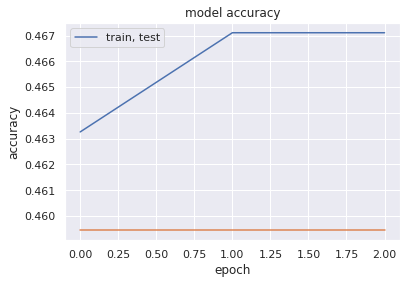

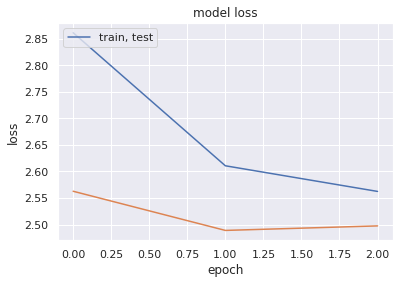

<Figure size 432x288 with 0 Axes>

In [199]:
#256 nodes in LSTM layer with glove embedding size 200 and adam optimizer
print('***********************************************************************')
print('256 nodes in LSTM layer with glove embedding size 200 and adam optimizer')
bilstm_200_5 = CreateBiLSTM(emb_200, 200, 74, 256, False)
RunClassifier(bilstm_200_5, X_train_nn, X_test_nn, y_train_nn, y_test_nn, 'Adam')

***********************************************************************
256 nodes in LSTM layer with glove embedding size 200 and RMS Prop optimizer
Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_39 (Embedding)     (None, 200, 200)          2628600   
_________________________________________________________________
bidirectional_28 (Bidirectio (None, 200, 512)          935936    
_________________________________________________________________
bidirectional_29 (Bidirectio (None, 200, 512)          1574912   
_________________________________________________________________
global_max_pooling1d_35 (Glo (None, 512)               0         
_________________________________________________________________
dense_143 (Dense)            (None, 128)               65664     
_________________________________________________________________
p_re_lu_22 (PReLU)           (None, 

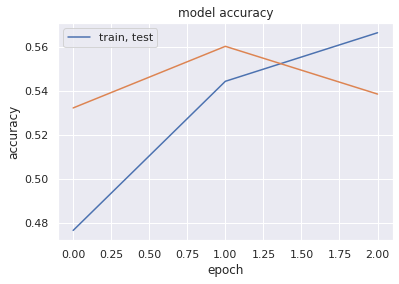

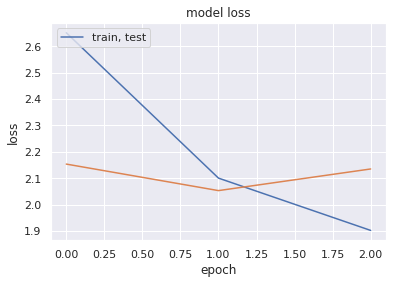

<Figure size 432x288 with 0 Axes>

In [200]:
#256 nodes in LSTM layer with glove embedding size 200 and RMS Prop optimizer
print('***********************************************************************')
print('256 nodes in LSTM layer with glove embedding size 200 and RMS Prop optimizer')
bilstm_200_6 = CreateBiLSTM(emb_200, 200, 74, 256, True)
RunClassifier(bilstm_200_6, X_train_nn, X_test_nn, y_train_nn, y_test_nn, 'RMS Prop')

In [201]:
metrics5= {'Nodes':[128,128,128,128,256,256],
            'Embedding':['Glove Embedding','Trained Embedding','Glove Embedding','Trained Embedding','Glove Embedding','Trained Embedding'],
            'Optimizer':['Adam','Adam','RMS Prop','RMS Prop','Adam','RMS Prop'],
            'Training Accuracy':[bilstm_200_1.evaluate(X_train_nn, y_train_nn)[1]*100,bilstm_200_2.evaluate(X_train_nn, y_train_nn)[1]*100, 
                                 bilstm_200_3.evaluate(X_train_nn, y_train_nn)[1]*100,bilstm_200_4.evaluate(X_train_nn, y_train_nn)[1]*100,
                                 bilstm_200_5.evaluate(X_train_nn, y_train_nn)[1]*100,bilstm_200_6.evaluate(X_train_nn, y_train_nn)[1]*100],
            'Test Accuracy':[bilstm_200_1.evaluate(X_test_nn, y_test_nn, verbose=0)[1]*100, bilstm_200_2.evaluate(X_test_nn, y_test_nn, verbose=0)[1]*100,
                             bilstm_200_3.evaluate(X_test_nn, y_test_nn, verbose=0)[1]*100, bilstm_200_4.evaluate(X_test_nn, y_test_nn, verbose=0)[1]*100,
                             bilstm_200_5.evaluate(X_test_nn, y_test_nn, verbose=0)[1]*100, bilstm_200_6.evaluate(X_test_nn, y_test_nn, verbose=0)[1]*100]}

df5 = pd.DataFrame(metrics5, columns=['Nodes','Embedding','Optimizer','Training Accuracy','Test Accuracy'])
print('Bidirectional LSTM with embedding size 200')
print(df5)

224/224 [==============================] - 6s 27ms/step - loss: 2.0222 - accuracy: 0.5617
Bidirectional LSTM with embedding size 200
   Nodes          Embedding Optimizer  Training Accuracy  Test Accuracy
0    128    Glove Embedding      Adam          46.613491      47.147384
1    128  Trained Embedding      Adam          58.354324      56.497622
2    128    Glove Embedding  RMS Prop          46.613491      47.147384
3    128  Trained Embedding  RMS Prop          57.752591      57.369256
4    256    Glove Embedding      Adam          46.613491      47.147384
5    256  Trained Embedding  RMS Prop          56.171286      55.784470


Bidirectional LSTM with embedding size as 300

***********************************************************************
128 nodes in LSTM layer with glove embedding size 300 and adam optimizer
Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_40 (Embedding)     (None, 200, 300)          3942900   
_________________________________________________________________
bidirectional_30 (Bidirectio (None, 200, 256)          439296    
_________________________________________________________________
bidirectional_31 (Bidirectio (None, 200, 256)          394240    
_________________________________________________________________
global_max_pooling1d_36 (Glo (None, 256)               0         
_________________________________________________________________
dense_146 (Dense)            (None, 128)               32896     
_________________________________________________________________
p_re_lu_24 (PReLU)           (None, 128)

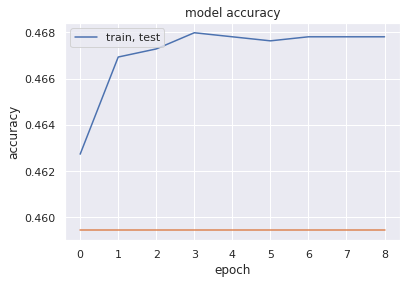

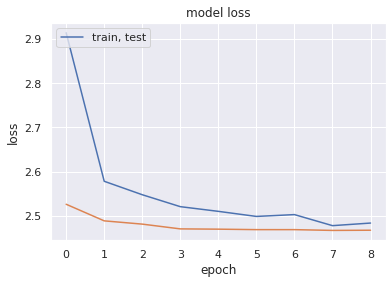

<Figure size 432x288 with 0 Axes>

In [202]:
#128 nodes in LSTM layer with glove embedding size 300 and adam optimizer
print('***********************************************************************')
print('128 nodes in LSTM layer with glove embedding size 300 and adam optimizer')
bilstm_300_1 = CreateBiLSTM(emb_300, 300, 74, 128, False)
RunClassifier(bilstm_300_1, X_train_nn, X_test_nn, y_train_nn, y_test_nn, 'Adam')

***********************************************************************
128 nodes in LSTM layer with trained embeddings size 300 and adam optimizer
Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_41 (Embedding)     (None, 200, 300)          3942900   
_________________________________________________________________
bidirectional_32 (Bidirectio (None, 200, 256)          439296    
_________________________________________________________________
bidirectional_33 (Bidirectio (None, 200, 256)          394240    
_________________________________________________________________
global_max_pooling1d_37 (Glo (None, 256)               0         
_________________________________________________________________
dense_149 (Dense)            (None, 128)               32896     
_________________________________________________________________
p_re_lu_26 (PReLU)           (None, 1

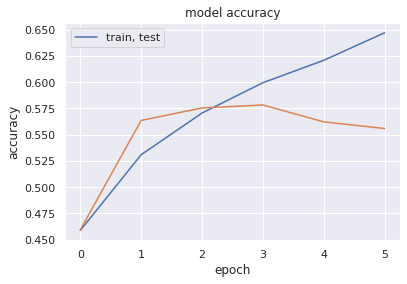

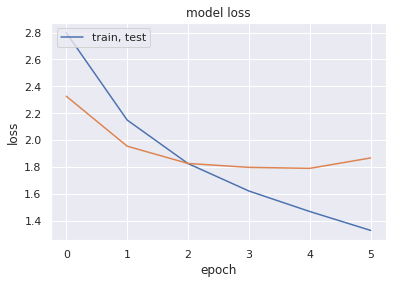

<Figure size 432x288 with 0 Axes>

In [203]:
#128 nodes in LSTM layer with trained embeddings size 300 and adam optimizer
print('***********************************************************************')
print('128 nodes in LSTM layer with trained embeddings size 300 and adam optimizer')
bilstm_300_2 = CreateBiLSTM(emb_300, 300, 74, 128, True)
RunClassifier(bilstm_300_2, X_train_nn, X_test_nn, y_train_nn, y_test_nn, 'Adam')

***********************************************************************
128 nodes in LSTM layer with glove embedding size 300 and RMS Prop optimizer
Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_42 (Embedding)     (None, 200, 300)          3942900   
_________________________________________________________________
bidirectional_34 (Bidirectio (None, 200, 256)          439296    
_________________________________________________________________
bidirectional_35 (Bidirectio (None, 200, 256)          394240    
_________________________________________________________________
global_max_pooling1d_38 (Glo (None, 256)               0         
_________________________________________________________________
dense_152 (Dense)            (None, 128)               32896     
_________________________________________________________________
p_re_lu_28 (PReLU)           (None, 

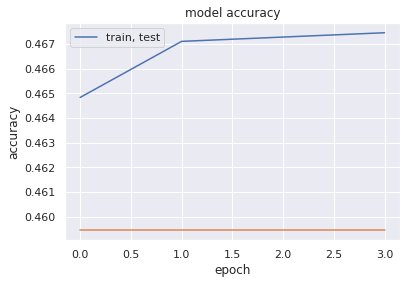

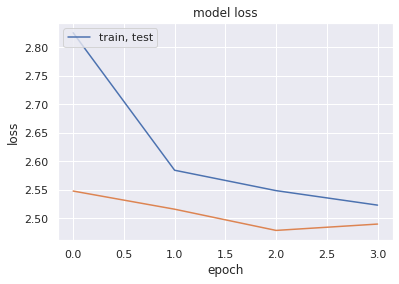

<Figure size 432x288 with 0 Axes>

In [204]:
#128 nodes in LSTM layer with glove embedding size 300 and RMS Prop optimizer
print('***********************************************************************')
print('128 nodes in LSTM layer with glove embedding size 300 and RMS Prop optimizer')
bilstm_300_3 = CreateBiLSTM(emb_300, 300, 74, 128, False)
RunClassifier(bilstm_300_3, X_train_nn, X_test_nn, y_train_nn, y_test_nn, 'RMS Prop')

***********************************************************************
128 nodes in LSTM layer with trained embedding sixe 300 and RMS Prop optimizer
Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_43 (Embedding)     (None, 200, 300)          3942900   
_________________________________________________________________
bidirectional_36 (Bidirectio (None, 200, 256)          439296    
_________________________________________________________________
bidirectional_37 (Bidirectio (None, 200, 256)          394240    
_________________________________________________________________
global_max_pooling1d_39 (Glo (None, 256)               0         
_________________________________________________________________
dense_155 (Dense)            (None, 128)               32896     
_________________________________________________________________
p_re_lu_30 (PReLU)           (None

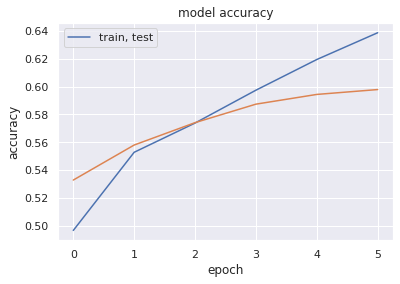

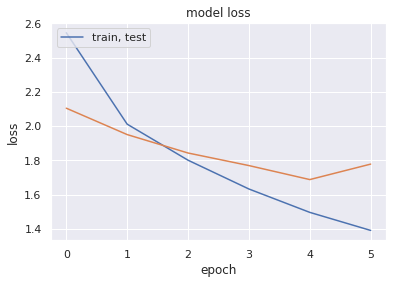

<Figure size 432x288 with 0 Axes>

In [205]:
#128 nodes in LSTM layer with trained embedding sixe 300 and RMS Prop optimizer
print('***********************************************************************')
print('128 nodes in LSTM layer with trained embedding sixe 300 and RMS Prop optimizer')
bilstm_300_4 = CreateBiLSTM(emb_300, 300, 74, 128, True)
RunClassifier(bilstm_300_4, X_train_nn, X_test_nn, y_train_nn, y_test_nn, 'RMS Prop')

***********************************************************************
256 nodes in LSTM layer with glove embedding size 300 and adam optimizer
Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_44 (Embedding)     (None, 200, 300)          3942900   
_________________________________________________________________
bidirectional_38 (Bidirectio (None, 200, 512)          1140736   
_________________________________________________________________
bidirectional_39 (Bidirectio (None, 200, 512)          1574912   
_________________________________________________________________
global_max_pooling1d_40 (Glo (None, 512)               0         
_________________________________________________________________
dense_158 (Dense)            (None, 128)               65664     
_________________________________________________________________
p_re_lu_32 (PReLU)           (None, 128)

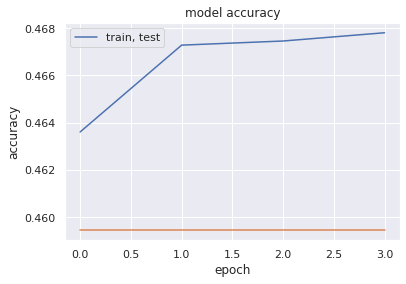

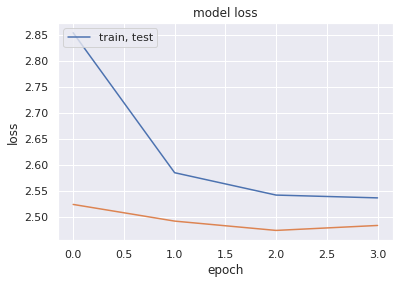

<Figure size 432x288 with 0 Axes>

In [206]:
#256 nodes in LSTM layer with glove embedding size 300 and adam optimizer
print('***********************************************************************')
print('256 nodes in LSTM layer with glove embedding size 300 and adam optimizer')
bilstm_300_5 = CreateBiLSTM(emb_300, 300, 74, 256, False)
RunClassifier(bilstm_300_5, X_train_nn, X_test_nn, y_train_nn, y_test_nn, 'Adam')

***********************************************************************
256 nodes in LSTM layer with glove embedding size 300 and RMS Prop optimizer
Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_45 (Embedding)     (None, 200, 300)          3942900   
_________________________________________________________________
bidirectional_40 (Bidirectio (None, 200, 512)          1140736   
_________________________________________________________________
bidirectional_41 (Bidirectio (None, 200, 512)          1574912   
_________________________________________________________________
global_max_pooling1d_41 (Glo (None, 512)               0         
_________________________________________________________________
dense_161 (Dense)            (None, 128)               65664     
_________________________________________________________________
p_re_lu_34 (PReLU)           (None, 

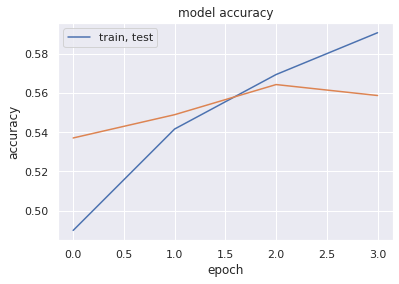

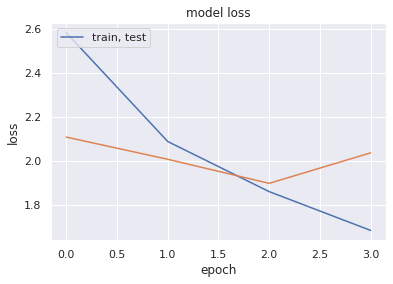

<Figure size 432x288 with 0 Axes>

In [207]:
#256 nodes in LSTM layer with glove embedding size 300 and RMS Prop optimizer
print('***********************************************************************')
print('256 nodes in LSTM layer with glove embedding size 300 and RMS Prop optimizer')
bilstm_300_6 = CreateBiLSTM(emb_300, 300, 74, 256, True)
RunClassifier(bilstm_300_6, X_train_nn, X_test_nn, y_train_nn, y_test_nn, 'RMS Prop')

In [208]:
metrics6= {'Nodes':[128,128,128,128,256,256],
            'Embedding':['Glove Embedding','Trained Embedding','Glove Embedding','Trained Embedding','Glove Embedding','Trained Embedding'],
            'Optimizer':['Adam','Adam','RMS Prop','RMS Prop','Adam','RMS Prop'],
            'Training Accuracy':[bilstm_300_1.evaluate(X_train_nn, y_train_nn)[1]*100,bilstm_300_2.evaluate(X_train_nn, y_train_nn)[1]*100, 
                                 bilstm_300_3.evaluate(X_train_nn, y_train_nn)[1]*100,bilstm_300_4.evaluate(X_train_nn, y_train_nn)[1]*100,
                                 bilstm_300_5.evaluate(X_train_nn, y_train_nn)[1]*100,bilstm_300_6.evaluate(X_train_nn, y_train_nn)[1]*100],
            'Test Accuracy':[bilstm_300_1.evaluate(X_test_nn, y_test_nn, verbose=0)[1]*100, bilstm_300_2.evaluate(X_test_nn, y_test_nn, verbose=0)[1]*100,
                             bilstm_300_3.evaluate(X_test_nn, y_test_nn, verbose=0)[1]*100, bilstm_300_4.evaluate(X_test_nn, y_test_nn, verbose=0)[1]*100,
                             bilstm_300_5.evaluate(X_test_nn, y_test_nn, verbose=0)[1]*100, bilstm_300_6.evaluate(X_test_nn, y_test_nn, verbose=0)[1]*100]}

df6 = pd.DataFrame(metrics6, columns=['Nodes','Embedding','Optimizer','Training Accuracy','Test Accuracy'])
print('Bidirectional LSTM with embedding size 300')
print(df6)

224/224 [==============================] - 6s 29ms/step - loss: 1.7226 - accuracy: 0.5847
Bidirectional LSTM with embedding size 300
   Nodes          Embedding Optimizer  Training Accuracy  Test Accuracy
0    128    Glove Embedding      Adam          46.613491      47.147384
1    128  Trained Embedding      Adam          66.806602      56.497622
2    128    Glove Embedding  RMS Prop          46.613491      47.147384
3    128  Trained Embedding  RMS Prop          65.309262      62.202853
4    256    Glove Embedding      Adam          46.613491      47.147384
5    256  Trained Embedding  RMS Prop          58.466274      56.576860


BEST Model: Bidirectional LSTM Model with 300 embedding size, trained embeddings and RMS Prop Optimizer; 
Accuracy: 62.2%

Save the Best Model

In [226]:
#Save the model to h5 file
#bilstm_300_4.save('/content/drive/MyDrive/Capstone NLP/Data/best_model.h5')

#Save the wights to h5 file
#bilstm_300_4.save_weights('/content/drive/MyDrive/Capstone NLP/Data/best_weigts.h5')

Load the best model and weights to predict functional groups

In [228]:
#Use this model to do predictions
from keras.models import load_model
bestmodel = load_model('/content/drive/MyDrive/Capstone NLP/Data/best_model.h5') #Load saved model
bestmodel.load_weights('/content/drive/MyDrive/Capstone NLP/Data/best_weigts.h5') #Load saved weights

In [230]:
bestmodel.evaluate(X_test_nn, y_test_nn)

40/40 [==============================] - 1s 22ms/step - loss: 1.7100 - accuracy: 0.6220


[1.710006594657898, 0.6220285296440125]

In [231]:
#Predict the classes using the bext model
bestmodel_preds = bestmodel.predict_classes(X_test_nn)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model Testing

In [235]:
#Let's try out with 100th item in the test data set
print('Original Group:', y_test_nn[101])
print('Predicted Group:', bestmodel_preds[101])

Original Group: [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Predicted Group: 0


Resut: Correct Prediction

In [236]:
print('Original Group:', y_test_nn[301])
print('Predicted Group:', bestmodel_preds[301])

Original Group: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Predicted Group: 4


Result: Incorrect prediction

In [240]:
print('Original Group:', y_test_nn[233])
print('Predicted Group:', bestmodel_preds[233])

Original Group: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Predicted Group: 17


Result: Correct prediction

In [245]:
print('Original Group:', y_test_nn[167])
print('Predicted Group:', bestmodel_preds[167])

Original Group: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
Predicted Group: 72


Result: Correct Prediction

In [246]:
print('Original Group:', y_test_nn[5])
print('Predicted Group:', bestmodel_preds[5])

Original Group: [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Predicted Group: 0


Result: Incorrect Prediction

Top 5 and 10 groups 

In [209]:
def DataSubset(n):
  top_grp= list(data_clean.groupby('Assignment group').size().\
                 reset_index().\
                 sort_values(by=0,ascending=False)[:n]['Assignment group'])
  data_topgroups=data_clean[data_clean['Assignment group'].isin(top_grp)]
  return data_topgroups

Top 10 groups

In [210]:
data_top10 = DataSubset(10)
tokenizer=Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(data_top10['Full Description'].values)       
sequences = tokenizer.texts_to_sequences(data_top10['Full Description'].values) 

In [211]:
X_ten=tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_len)
Y_ten = pd.get_dummies(data_top10['Assignment group']).values

In [212]:
print('Shape of input tensor:', X_ten.shape)
print('Shape of label tensor:', Y_ten.shape)

Shape of input tensor: (6349, 200)
Shape of label tensor: (6349, 10)


In [213]:
X_train_ten, X_test_ten, y_train_ten, y_test_ten = train_test_split(X_ten,Y_ten, test_size = 0.15, random_state = 42)
print(X_train_ten.shape,y_train_ten.shape)
print(X_test_ten.shape,y_test_ten.shape)

(5396, 200) (5396, 10)
(953, 200) (953, 10)


In [214]:
num_words = len(tokenizer.word_index) + 1
print(num_words)

9424


Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_46 (Embedding)     (None, 200, 200)          1884800   
_________________________________________________________________
bidirectional_42 (Bidirectio (None, 200, 256)          336896    
_________________________________________________________________
bidirectional_43 (Bidirectio (None, 200, 256)          394240    
_________________________________________________________________
global_max_pooling1d_42 (Glo (None, 256)               0         
_________________________________________________________________
dense_164 (Dense)            (None, 128)               32896     
_________________________________________________________________
p_re_lu_36 (PReLU)           (None, 128)               128       
_________________________________________________________________
dropout_116 (Dropout)        (None, 128)             

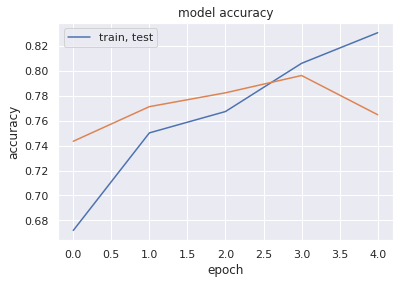

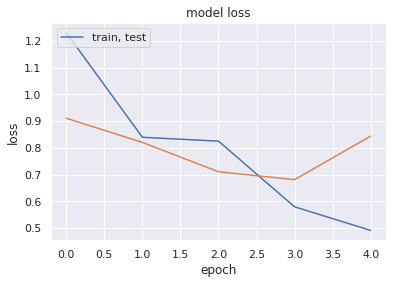

<Figure size 432x288 with 0 Axes>

In [215]:
emb_200 = GenerateEmbeddings(EMBEDDING_FILE_200, 200)
bilstm_200_top10 = CreateBiLSTM(emb_200, 200, 10, 128, True)
RunClassifier(bilstm_200_top10, X_train_ten, X_test_ten, y_train_ten, y_test_ten, 'RMS Prop')

Top 5 groups

In [216]:
data_top5 = DataSubset(5)
tokenizer=Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(data_top5['Full Description'].values)       
sequences = tokenizer.texts_to_sequences(data_top5['Full Description'].values) 

In [217]:
X_five=tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_len)
Y_five = pd.get_dummies(data_top5['Assignment group']).values

In [218]:
print('Shape of input tensor:', X_five.shape)
print('Shape of label tensor:', Y_five.shape)

Shape of input tensor: (5365, 200)
Shape of label tensor: (5365, 5)


In [219]:
X_train_five, X_test_five, y_train_five, y_test_five = train_test_split(X_five,Y_five, test_size = 0.15, random_state = 42)
print(X_train_five.shape,y_train_five.shape)
print(X_test_five.shape,y_test_five.shape)

(4560, 200) (4560, 5)
(805, 200) (805, 5)


In [220]:
num_words = len(tokenizer.word_index) + 1
print(num_words)

7252


Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_47 (Embedding)     (None, 200, 200)          1450400   
_________________________________________________________________
bidirectional_44 (Bidirectio (None, 200, 256)          336896    
_________________________________________________________________
bidirectional_45 (Bidirectio (None, 200, 256)          394240    
_________________________________________________________________
global_max_pooling1d_43 (Glo (None, 256)               0         
_________________________________________________________________
dense_167 (Dense)            (None, 128)               32896     
_________________________________________________________________
p_re_lu_38 (PReLU)           (None, 128)               128       
_________________________________________________________________
dropout_118 (Dropout)        (None, 128)             

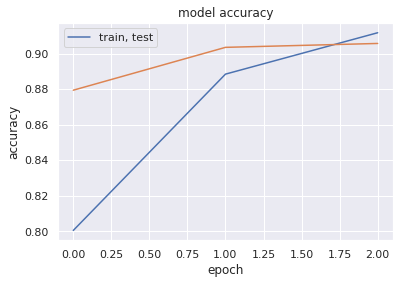

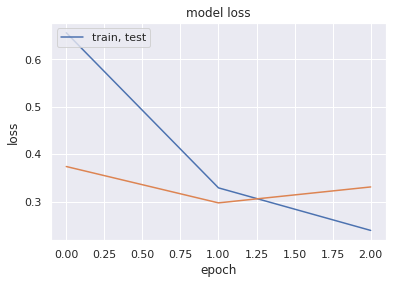

<Figure size 432x288 with 0 Axes>

In [221]:
emb_200 = GenerateEmbeddings(EMBEDDING_FILE_200, 200)
bilstm_200_top5 = CreateBiLSTM(emb_200, 200, 5, 128, True)
RunClassifier(bilstm_200_top5, X_train_five, X_test_five, y_train_five, y_test_five, 'RMS Prop')

In [221]:
################################# END OF PROJECT #################################